# Projects 1. 다음 분기에 어떤 게임을 설계해야 할까?

#  1) 데이터 EDA, Feature Engineering

In [2]:
# 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [3]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [4]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


### a) 결측치 확인 및 처리

In [5]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df.shape

(16598, 10)

In [7]:
df.index.nunique()

16598

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [9]:
df.head(2).T

,0,1
Unnamed: 0,1,2
Name,Candace Kane's Candy Factory,The Munchables
Platform,DS,Wii
Year,2008.0,2009.0
Genre,Action,Action
Publisher,Destineer,Namco Bandai Games
NA_Sales,0.04,0.17
EU_Sales,0,0
JP_Sales,0,0
Other_Sales,0,0.01


In [10]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
df[df['Year'].isnull() | df['Genre'].isnull() | df['Publisher'].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...,...
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [12]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [13]:
df.Genre.value_counts(normalize=True)

Action          0.199722
Sports          0.141467
Misc            0.104786
Role-Playing    0.089618
Shooter         0.079043
Adventure       0.077351
Racing          0.075115
Platform        0.053420
Simulation      0.052272
Fighting        0.051184
Strategy        0.041093
Puzzle          0.034929
Name: Genre, dtype: float64

In [14]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [15]:
df.dropna(subset=['Year'], how='any', axis='index', inplace=True)

In [16]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [17]:
df[df['Genre'].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [18]:
df.dropna(subset=['Genre'], how='any', axis='index', inplace=True)

In [19]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [20]:
nan_pub = df[df['Publisher'].isnull()]

In [21]:
df.Publisher.fillna('Unknown', inplace=True)

In [22]:
nan_pub

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1961,1962,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
3412,3413,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0
3684,3685,Dragon Ball GT: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.12,0.05,0,0
4367,4368,Strawberry Shortcake: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.11,0.04,0,0
5207,5208,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0,0.01
5245,5246,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.11,0.04,0,0


In [23]:
df[df.Name == 'UK Truck Simulator']

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,273,UK Truck Simulator,PC,2010.0,Simulation,Unknown,0,0.03,0,0


In [24]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [25]:
df.drop(columns='Unnamed: 0', inplace=True)

In [26]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [27]:
df = df.reset_index(drop=True)

In [28]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [29]:
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  object 
 6   EU_Sales     16277 non-null  object 
 7   JP_Sales     16277 non-null  object 
 8   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


### b) 이상치 확인 및 처리

In [31]:
df.Year = df.Year.astype(str).str[:-2]

In [32]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  object
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [34]:
df['NA_Sales'].describe()

count     16277
unique      489
top           0
freq       4375
Name: NA_Sales, dtype: object

In [35]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [36]:
df.Year = df.Year.astype('int')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [38]:
df_s_v = df.sort_values(by=['Year'])

In [39]:
df[df.Year < 1000] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15676,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15792,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15837,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16078,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [40]:
df[df.Year < 100]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15676,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15792,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15837,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16078,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [41]:
df2000 = df[df.Year < 10]

In [42]:
df2000

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
1002,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0,0.01
1205,Ratchet & Clank: Going Commando,PS2,3,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1345,LEGO Star Wars II: The Original Trilogy,PS2,6,Action,LucasArts,1.85,0.64,0.01,0.19
1390,Rogue Warrior,PS3,9,Shooter,Bethesda Softworks,0.11,0.02,0,0.01
1659,SpongeBob SquarePants featuring Nicktoons: Glo...,PS2,8,Action,THQ,0.29,0.22,0,0.07
2211,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
2413,SOCOM: U.S. Navy SEALs Fireteam Bravo 2,PSP,6,Shooter,Sony Computer Entertainment,0.81,0.11,0,0.13
2426,Splat Renegade Paintball,XB,5,Sports,Take-Two Interactive,0.04,0.01,0,0


In [43]:
df_2000 = df[df.Year <80]

In [44]:
df_2000.Year = df_2000.Year + 2000

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
df_2000

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,2009,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
210,NASCAR Unleashed,PS3,2011,Racing,Activision,0.09,0,0,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Action,Little Orbit,0,0.02,0,0
759,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0,0.14
1002,Wolfenstein,PC,2009,Shooter,Activision,0.01,0.03,0,0.01
...,...,...,...,...,...,...,...,...,...
15308,Rally Fusion: Race of Champions,PS2,2002,Racing,Activision,0.06,0.05,0,0.02
15528,Theatrhythm Dragon Quest,3DS,2015,Misc,Square Enix,0,0,0.15,0
15792,Fab 5 Soccer,DS,2008,Sports,Destineer,0.01,0,0,0
15837,Dragon Ball Z: Burst Limit,X360,2008,Fighting,Atari,0.24,0.18,0.03,0.05


In [46]:
df_1900 = df[(df.Year >= 80) & (df.Year <100)]

In [47]:
df_1900.Year = df_1900.Year + 1900 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
df_a = df[df.Year >= 100]

In [49]:
df = pd.concat([df_1900, df_2000, df_a])

In [50]:
df.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,0.9,0
2,Casper,PS,1996,Adventure,Interplay,0.46,0.31,0,0.05
3,Glover,N64,1998,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1.05,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [51]:
df.shape

(16277, 9)

In [52]:
df_clean = df.copy()

In [53]:
df_clean.shape

(16277, 9)

In [54]:
df_clean['NA_Sales'] = df_clean['NA_Sales'].str.replace('M', '')

In [55]:
df_clean['NA_Sales'] = df_clean['NA_Sales'].str.replace('K', '000').astype('float')

In [56]:
df_clean['EU_Sales'] = df_clean['EU_Sales'].str.replace('M', '')
df_clean['EU_Sales'] = df_clean['EU_Sales'].str.replace('K', '000').astype('float')

In [57]:
df_clean['JP_Sales'] = df_clean['JP_Sales'].str.replace('M', '')
df_clean['JP_Sales'] = df_clean['JP_Sales'].str.replace('K', '000').astype('float')

In [58]:
df_clean['Other_Sales'] = df_clean['Other_Sales'].str.replace('M', '')
df_clean['Other_Sales'] = df_clean['Other_Sales'].str.replace('K', '000').astype('float')

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 79 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [60]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01
895,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,0.9,0
2388,Casper,PS,1996,Adventure,Interplay,0.46,0.31,0,0.05
3429,Glover,N64,1998,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4281,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1.05,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [61]:
df_clean['NA_Sales'][df_clean['NA_Sales'] >= 1000] = df_clean['NA_Sales'][df_clean['NA_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_clean['NA_Sales'][df_clean['NA_Sales'] >= 1000] /1000000

Series([], Name: NA_Sales, dtype: float64)

In [63]:
df_clean['NA_Sales']

79       0.10
895      0.00
2388     0.46
3429     0.72
4281     0.00
         ... 
16272    0.15
16273    0.01
16274    0.44
16275    0.05
16276    0.00
Name: NA_Sales, Length: 16277, dtype: float64

In [64]:
df_clean['EU_Sales'][df_clean['EU_Sales'] >= 1000] = df_clean['EU_Sales'][df_clean['EU_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_clean['JP_Sales'][df_clean['JP_Sales'] >= 1000] = df_clean['JP_Sales'][df_clean['JP_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_clean['Other_Sales'][df_clean['Other_Sales'] >= 1000] = df_clean['Other_Sales'][df_clean['Other_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_clean.NA_Sales = df_clean.NA_Sales * 1000000

In [68]:
df_clean.EU_Sales = df_clean.EU_Sales * 1000000
df_clean.JP_Sales = df_clean.JP_Sales * 1000000
df_clean.Other_Sales = df_clean.Other_Sales * 1000000

In [69]:
df_clean.NA_Sales = df_clean.NA_Sales.astype('int')
df_clean.EU_Sales = df_clean.EU_Sales.astype('int')
df_clean.JP_Sales = df_clean.JP_Sales.astype('int')
df_clean.Other_Sales = df_clean.Other_Sales.astype('int')

In [70]:
df_clean = df_clean.reset_index(drop=True)

In [71]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [72]:
df_clean['Year'].sort_values()

14005    1980
14738    1980
12904    1980
9979     1980
9104     1980
         ... 
5401     2016
5273     2017
9966     2017
14951    2017
6836     2020
Name: Year, Length: 16277, dtype: int64

In [73]:
df.Platform.value_counts(normalize=True)

DS      0.130798
PS2     0.130307
PS3     0.079806
Wii     0.078884
X360    0.075690
PSP     0.073294
PS      0.072802
PC      0.057750
GBA     0.049702
XB      0.049088
GC      0.033237
3DS     0.030657
PSV     0.025250
PS4     0.020581
N64     0.019230
SNES    0.014683
XOne    0.013025
SAT     0.010628
WiiU    0.008785
2600    0.007065
NES     0.006021
GB      0.005959
DC      0.003195
GEN     0.001659
NG      0.000737
SCD     0.000369
WS      0.000369
3DO     0.000184
TG16    0.000123
GG      0.000061
PCFX    0.000061
Name: Platform, dtype: float64

# 데이터 확인(숨김처리)

In [74]:
platform_grp = df_clean.groupby(['Platform'])

In [75]:
platform_grp.get_group('DS')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
29,Kamen Rider Battle: Ganbaride,DS,2010,Strategy,Namco Bandai Games,0,0,140000,0
31,Disney's Chicken Little: Ace In Action,DS,2006,Shooter,Disney Interactive Studios,60000,0,0,0
32,Diner Dash: Sizzle & Serve,DS,2007,Puzzle,Eidos Interactive,340000,30000,0,30000
37,Dragon Quest Heroes: Rocket Slime,DS,2005,Action,Square Enix,130000,0,310000,10000
47,Freedom Wings,DS,2006,Simulation,Natsume,20000,0,0,0
...,...,...,...,...,...,...,...,...,...
16235,ASH: Archaic Sealed Heat,DS,2007,Role-Playing,Nintendo,0,0,120000,0
16242,Sherlock Holmes: The Mystery of the Mummy,DS,2009,Adventure,Focus Home Interactive,60000,300000,0,40000
16252,GoldenEye 007 (2010),DS,2010,Action,Activision,110000,30000,0,10000
16260,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0,30000,0,0


In [76]:
platform_grp['Platform'].value_counts()

Platform  Platform
2600      2600         115
3DO       3DO            3
3DS       3DS          499
DC        DC            52
DS        DS          2129
GB        GB            97
GBA       GBA          809
GC        GC           541
GEN       GEN           27
GG        GG             1
N64       N64          313
NES       NES           98
NG        NG            12
PC        PC           940
PCFX      PCFX           1
PS        PS          1185
PS2       PS2         2121
PS3       PS3         1299
PS4       PS4          335
PSP       PSP         1193
PSV       PSV          411
SAT       SAT          173
SCD       SCD            6
SNES      SNES         239
TG16      TG16           2
WS        WS             6
Wii       Wii         1284
WiiU      WiiU         143
X360      X360        1232
XB        XB           799
XOne      XOne         212
Name: Platform, dtype: int64

In [77]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [78]:
df_clean['total_sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']

In [79]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [80]:
total_sales_of_genre = df_clean.groupby('Genre')['total_sales'].mean()

In [81]:
sales_of_genre = df_clean.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [82]:
sales_of_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,264892.040716,158433.065083,48306.600864,56752.004318
Adventure,80251.968504,50165.354331,40858.267717,13149.606299
Fighting,263892.213174,119640.718563,104359.281437,43293.413174
Misc,234774.192375,123284.457478,61102.639296,42662.756012
Platform,509588.099542,229576.657895,149347.824943,58867.276888
Puzzle,214426.805996,89029.982363,99188.712522,21940.035273
Racing,290737.702459,192647.540164,46163.934426,62713.114754
Role-Playing,217435.197135,124897.679400,233922.236698,38697.135061
Shooter,448812.497656,242367.184375,29828.125000,79578.125000


In [83]:
sales_of_genre.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,264892.040716,80251.968504,263892.213174,234774.192375,509588.099542,214426.805996,290737.702459,217435.197135,448812.497656,213698.466431,290239.232710,101328.358209
EU_Sales,158433.065083,50165.354331,119640.718563,123284.457478,229576.657895,89029.982363,192647.540164,124897.679400,242367.184375,133297.997644,161361.461070,67044.776119
JP_Sales,48306.600864,40858.267717,104359.281437,61102.639296,149347.824943,99188.712522,46163.934426,233922.236698,29828.125000,74840.989399,58616.789474,73283.582090
Other_Sales,56752.004318,13149.606299,43293.413174,42662.756012,58867.276888,21940.035273,62713.114754,38697.135061,79578.125000,36890.459364,57568.507612,16761.194030


In [84]:
sales_of_genre_columns = sales_of_genre.columns

In [85]:
sales_of_genre_index = sales_of_genre.index

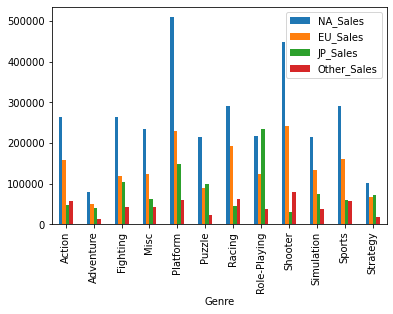

In [86]:
sales_of_genre.plot(kind='bar')

In [87]:
c = df_clean.groupby(['Genre', 'Year'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [88]:
c

NA_Sales       EU_Sales       JP_Sales   Other_Sales
Genre    Year                                                           
Action   1980  320000.000000   20000.000000       0.000000      0.000000
         1981  554400.000000   32400.000000       0.000000   4800.000000
         1982  337222.222222   21111.111111       0.000000   2777.777778
         1983  381428.571429   24285.714286       0.000000   2857.142857
         1984  800000.000000  190000.000000  830000.000000  30000.000000
...                      ...            ...            ...           ...
Strategy 2012   62666.666667   66000.000000   74000.000000  19333.333333
         2013  125789.473684  130000.000000   43157.894737  33684.210526
         2014   20000.000000   27500.000000   68750.000000   5000.000000
         2015   33529.411765   57647.058824    8823.529412   7058.823529
         2016   11000.000000   32000.000000    5000.000000   4000.000000

[388 rows x 4 columns]

In [89]:
df_clean['Year'].value_counts()

2009    1428
2008    1423
2010    1255
2007    1196
2011    1136
2006    1005
2005     939
2002     826
2003     774
2004     759
2012     654
2015     611
2014     582
2013     545
2001     480
1998     377
2000     348
2016     344
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

In [90]:
df['Platform'].value_counts()

DS      2129
PS2     2121
PS3     1299
Wii     1284
X360    1232
PSP     1193
PS      1185
PC       940
GBA      809
XB       799
GC       541
3DS      499
PSV      411
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

다음 분기에 어떤 게임을 설계해야 할까

2015 - 2020

휴대용 게임: WiiU DS 3DS PSP PSV GBA SAT GB NG SCD WS     
콘솔 게임 : Wii PS PS2 PS3 PS4 XB X360 XOne GC N64 SNES NES 2600 DC GEN 3D TG16 GG PCFX          
PC 게임 : PC

In [91]:
df_11_16 = df_clean[(df_clean.Year >= 2011) & (df_clean.Year <= 2016)]

In [92]:
df_11_16 = df_11_16.sort_values(by=['Year'])

In [93]:
df_11_16.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
1,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,Disney Interactive Studios,370000,490000,0,100000,960000
2,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
3,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000
4,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...
3867,Homefront: The Revolution,XOne,2016,Shooter,Deep Silver,50000,70000,0,10000,130000
3868,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0,0,20000,0,20000
3869,Mirror's Edge Catalyst,PS4,2016,Platform,Electronic Arts,100000,140000,20000,60000,320000
3870,Rose to Tasogare no Kojou,PSV,2016,Action,Nippon Ichi Software,0,0,20000,0,20000


In [94]:
df_11_16['Platform'].value_counts()

PS3     703
X360    499
3DS     499
PSV     409
PC      371
PS4     334
PSP     311
XOne    212
Wii     197
DS      187
WiiU    143
PS2       7
Name: Platform, dtype: int64

휴대용 게임: WiiU DS 3DS PSP PSV GBA SAT GB NG SCD WS     
콘솔 게임 : Wii PS PS2 PS3 PS4 XB X360 XOne GC N64 SNES NES 2600 DC GEN 3D TG16 GG PCFX          
PC 게임 : PC

NA_Sales	EU_Sales	JP_Sales	Other_Sales

In [95]:
df_11_16['total_sales'] = df_11_16['NA_Sales'] + df_11_16['EU_Sales'] + df_11_16['JP_Sales'] + df_11_16['Other_Sales']

In [96]:
df_11_16

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
11734,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,Disney Interactive Studios,370000,490000,0,100000,960000
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
11743,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000
4953,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...
5988,Homefront: The Revolution,XOne,2016,Shooter,Deep Silver,50000,70000,0,10000,130000
14785,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0,0,20000,0,20000
9546,Mirror's Edge Catalyst,PS4,2016,Platform,Electronic Arts,100000,140000,20000,60000,320000
1710,Rose to Tasogare no Kojou,PSV,2016,Action,Nippon Ichi Software,0,0,20000,0,20000


In [97]:
df_consoles = df_11_16[(df_11_16['Platform'] == 'PS3')| (df_11_16['Platform'] == 'X360') | (df_11_16['Platform'] == 'PS4') | (df_11_16['Platform'] == 'XOne') | (df_11_16['Platform'] == 'Wii') | (df_11_16['Platform'] == 'PS2')]
df_handheld_game_consoles = df_11_16[(df_11_16['Platform'] == '3DS') | (df_11_16['Platform'] == 'PSV') | (df_11_16['Platform'] == 'PSP') | (df_11_16['Platform'] == 'DS') | (df_11_16['Platform'] == 'WiiU')]
df_pc_game = df_11_16[df_11_16['Platform'] == 'PC']

In [98]:
game_consoles = np.repeat('console', len(df_consoles))
game_headheld = np.repeat('headheld', len(df_handheld_game_consoles))
game_pc = np.repeat('pc', len(df_pc_game))

In [99]:
df_consoles['three_way_platform'] = game_consoles
df_handheld_game_consoles['three_way_platform'] = game_headheld
df_pc_game['three_way_platform'] = game_pc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [100]:
df_platform = pd.concat([df_consoles, df_handheld_game_consoles, df_pc_game])

In [101]:
a = df_platform.groupby(['Year', 'three_way_platform'])['total_sales'].mean()

In [102]:
pd.DataFrame(a)

total_sales
Year three_way_platform              
2011 console             6.416462e+05
     headheld            2.669882e+05
     pc                  2.513571e+05
2012 console             8.137544e+05
     headheld            3.463961e+05
     pc                  3.852459e+05
2013 console             1.043092e+06
     headheld            3.143411e+05
     pc                  3.368421e+05
2014 console             7.717460e+05
     headheld            3.617489e+05
     pc                  3.029545e+05
2015 console             6.141088e+05
     headheld            2.196957e+05
     pc                  1.606000e+05
2016 console             2.739303e+05
     headheld            1.258095e+05
     pc                  6.842105e+04

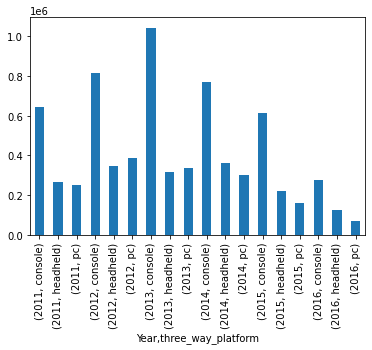

In [103]:
a.plot(kind='bar')

In [104]:
df_11_16['Genre'].value_counts()

Action          1209
Role-Playing     452
Adventure        386
Sports           384
Misc             361
Shooter          314
Racing           177
Fighting         156
Simulation       127
Platform         120
Strategy         115
Puzzle            71
Name: Genre, dtype: int64

In [105]:
df_11_16.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
1,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,Disney Interactive Studios,370000,490000,0,100000,960000
2,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
3,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000
4,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...
3867,Homefront: The Revolution,XOne,2016,Shooter,Deep Silver,50000,70000,0,10000,130000
3868,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0,0,20000,0,20000
3869,Mirror's Edge Catalyst,PS4,2016,Platform,Electronic Arts,100000,140000,20000,60000,320000
3870,Rose to Tasogare no Kojou,PSV,2016,Action,Nippon Ichi Software,0,0,20000,0,20000


In [106]:
df_11_16['Year']

15       2011
11734    2011
4963     2011
11743    2011
4953     2011
         ... 
5988     2016
14785    2016
9546     2016
1710     2016
5349     2016
Name: Year, Length: 3872, dtype: int64

In [107]:
df_11_16['Genre']

15          Racing
11734       Action
4963       Shooter
11743       Action
4953     Adventure
           ...    
5988       Shooter
14785       Action
9546      Platform
1710        Action
5349     Adventure
Name: Genre, Length: 3872, dtype: object

In [108]:
df_11_16['total_sales']

15        100000
11734     960000
4963      890000
11743    1060000
4953       20000
          ...   
5988      130000
14785      20000
9546      320000
1710       20000
5349       20000
Name: total_sales, Length: 3872, dtype: int64

In [109]:
df_1 = pd.DataFrame(df_11_16['total_sales'], index=[2011, 2012, 2013, 2014, 2015, 2016], columns=pd.Index(df_11_16['Genre']))

In [110]:
df_11_16.query('Year == 2011')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
11734,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,Disney Interactive Studios,370000,490000,0,100000,960000
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
11743,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000
4953,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...
2482,Venus & Braves: Majo to Megami to Horobi no Yogen,PSP,2011,Role-Playing,Namco Bandai Games,0,0,50000,0,50000
2609,Serious Sam HD: Gold Edition,X360,2011,Shooter,Mastertronic,0,20000,0,0,20000
3124,Dunamis 15,X360,2011,Adventure,5pb,0,0,20000,0,20000
15936,Hallowed Legends: Samhain,PC,2011,Adventure,Focus Home Interactive,0,20000,0,10000,30000


In [111]:
df_11_16

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
11734,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,Disney Interactive Studios,370000,490000,0,100000,960000
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
11743,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000
4953,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...
5988,Homefront: The Revolution,XOne,2016,Shooter,Deep Silver,50000,70000,0,10000,130000
14785,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0,0,20000,0,20000
9546,Mirror's Edge Catalyst,PS4,2016,Platform,Electronic Arts,100000,140000,20000,60000,320000
1710,Rose to Tasogare no Kojou,PSV,2016,Action,Nippon Ichi Software,0,0,20000,0,20000


In [112]:
df_1

Genre,Racing,Action,Shooter,Action,Adventure,Misc,Action,Misc,Sports,Strategy,...,Strategy,Action,Simulation,Role-Playing,Misc,Shooter,Action,Platform,Action,Adventure
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df_platform

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,three_way_platform
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000,console
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000,console
11743,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000,console
4953,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000,console
4944,Need for Speed: The Run,Wii,2011,Action,Electronic Arts,130000,130000,10000,30000,300000,console
...,...,...,...,...,...,...,...,...,...,...,...
3957,Rise of the Tomb Raider,PC,2016,Adventure,Square Enix,0,90000,0,10000,100000,pc
1629,Battleborn,PC,2016,Shooter,Take-Two Interactive,30000,30000,0,10000,70000,pc
7506,XCOM 2,PC,2016,Strategy,Take-Two Interactive,90000,100000,0,20000,210000,pc
1726,Dark Souls III,PC,2016,Role-Playing,Namco Bandai Games,0,50000,0,0,50000,pc


In [114]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [115]:
a = df_clean.groupby(['Year', 'Genre'])['total_sales'].mean()

In [116]:
a = a.unstack()
a

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,3.400000e+05,NaN,7.700000e+05,6.750000e+05,NaN,NaN,NaN,NaN,3.535000e+06,NaN,NaN,NaN
1981,5.916000e+05,NaN,NaN,NaN,2.306667e+06,1.125000e+06,4.800000e+05,NaN,1.002000e+06,4.400000e+05,1.950000e+05,NaN
1982,3.611111e+05,NaN,NaN,8.700000e+05,1.006000e+06,3.346667e+06,7.850000e+05,NaN,7.620000e+05,NaN,5.300000e+05,NaN
1983,4.085714e+05,4.000000e+05,NaN,2.140000e+06,1.386000e+06,7.800000e+05,NaN,NaN,4.900000e+05,NaN,3.200000e+06,NaN
1984,1.850000e+06,NaN,NaN,1.450000e+06,6.900000e+05,1.046667e+06,1.983333e+06,NaN,1.036667e+07,NaN,3.085000e+06,NaN
1985,1.760000e+06,NaN,1.050000e+06,NaN,1.079250e+07,8.025000e+05,NaN,NaN,1.000000e+06,4.000000e+04,1.960000e+06,NaN
1986,2.290000e+06,NaN,NaN,NaN,1.565000e+06,NaN,1.960000e+06,2.520000e+06,9.725000e+05,NaN,1.860000e+06,NaN
1987,5.550000e+05,4.380000e+06,2.710000e+06,NaN,8.700000e+05,NaN,NaN,1.550000e+06,3.450000e+05,NaN,9.275000e+05,NaN
1988,8.700000e+05,NaN,NaN,NaN,6.932500e+06,5.580000e+06,2.140000e+06,1.960000e+06,5.100000e+05,3.000000e+04,1.800000e+06,NaN


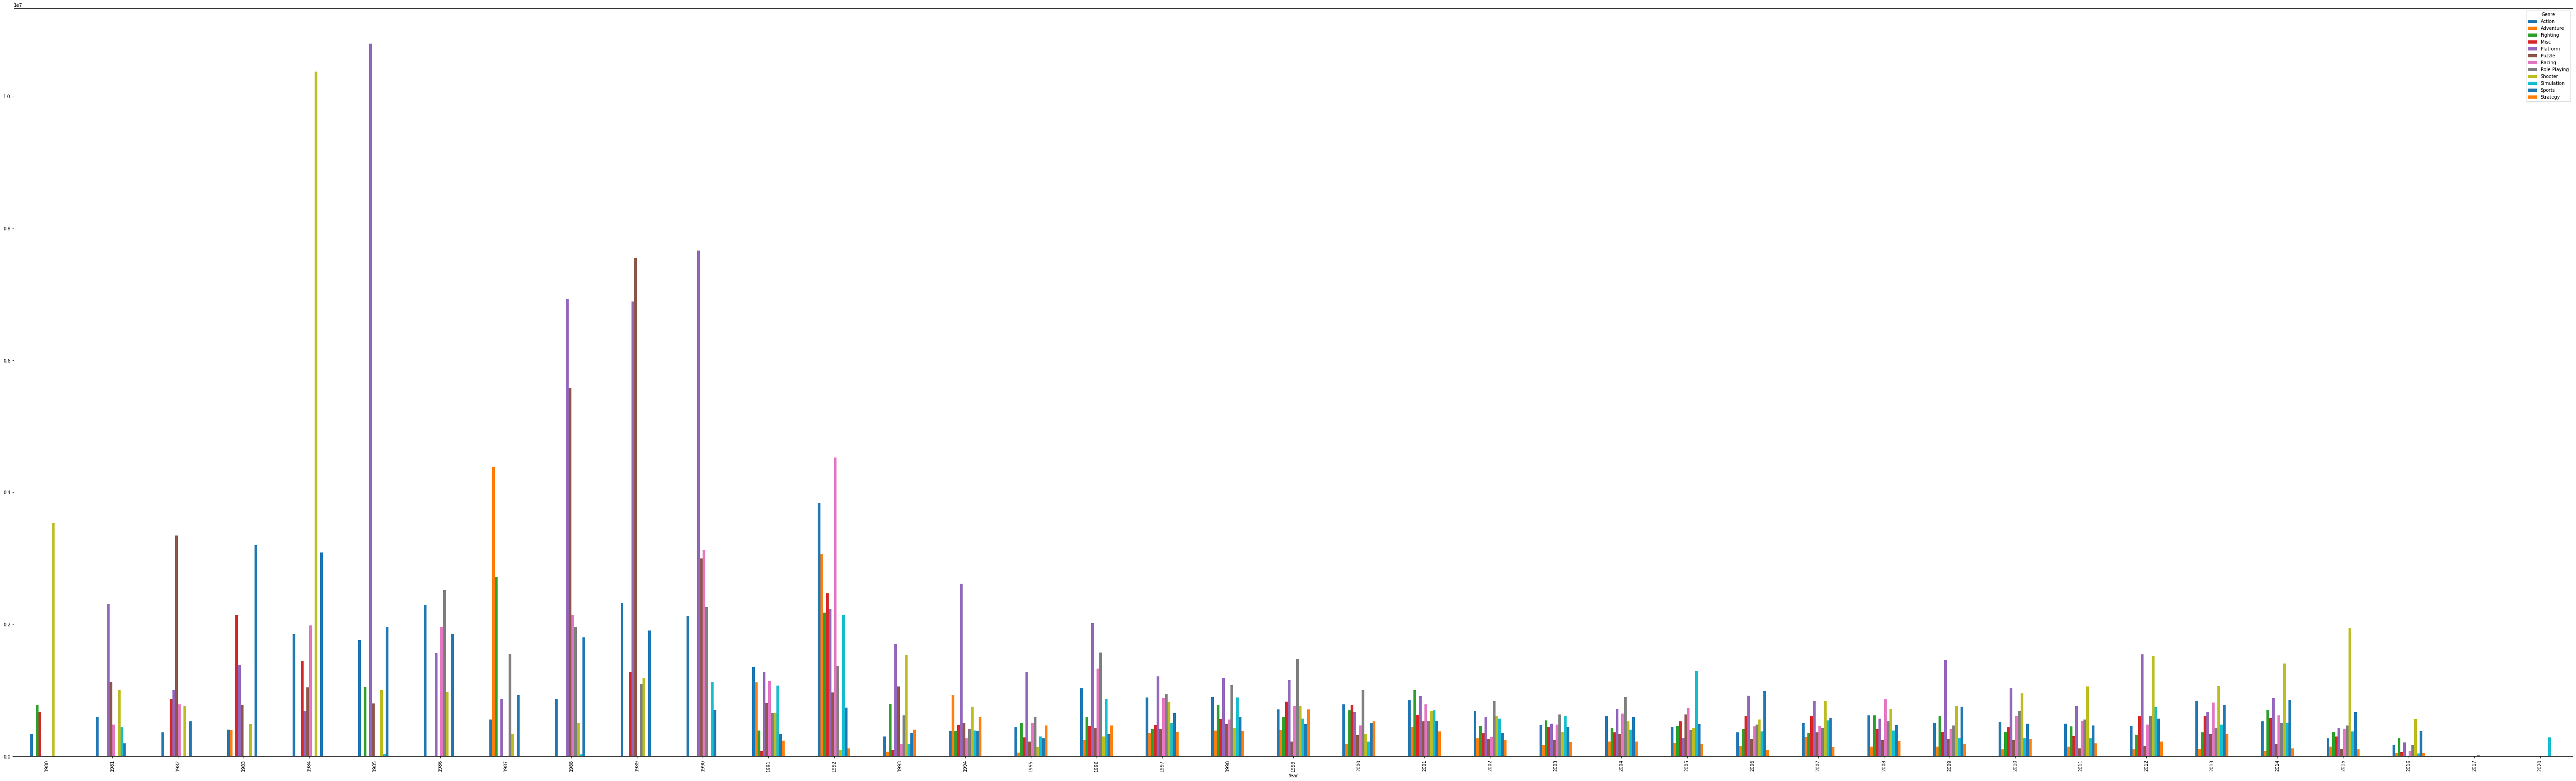

In [117]:
a.plot(kind='bar', figsize=(100, 30))

In [118]:
sales_of_year_genre = df_platform.groupby(['Year', 'Genre'])['total_sales'].mean()

In [119]:
sales_of_year_genre = sales_of_year_genre.unstack()
sales_of_year_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2011,497907.945607,148411.214953,451224.489796,304754.098361,7.600000e+05,118604.651163,538000.000000,561263.147368,1.056915e+06,273750.000000,467704.918033,196304.347826
2012,457613.632576,103508.771930,328620.689655,603421.026316,1.546667e+06,158181.818182,481000.000000,612435.897436,1.517500e+06,742777.722222,572222.222222,222000.000000
2013,846013.506757,110166.666667,361500.000000,610952.380952,6.781081e+05,333333.333333,813750.000000,436285.714286,1.063220e+06,482222.222222,783773.584906,332631.578947
2014,532311.822581,81200.000000,702173.913043,578780.487805,8.870000e+05,188750.000000,618888.851852,504285.714286,1.404043e+06,503636.363636,848000.000000,121250.000000
2015,269762.845850,151132.075472,370476.190476,298974.358974,4.321429e+05,115000.000000,416842.105263,467051.282051,1.944706e+06,374000.000000,669193.532258,107058.823529
2016,166806.722689,53235.294118,275000.000000,63888.888889,2.080000e+05,NaN,83500.000000,168750.000000,5.678125e+05,43333.333333,385000.000000,52000.000000


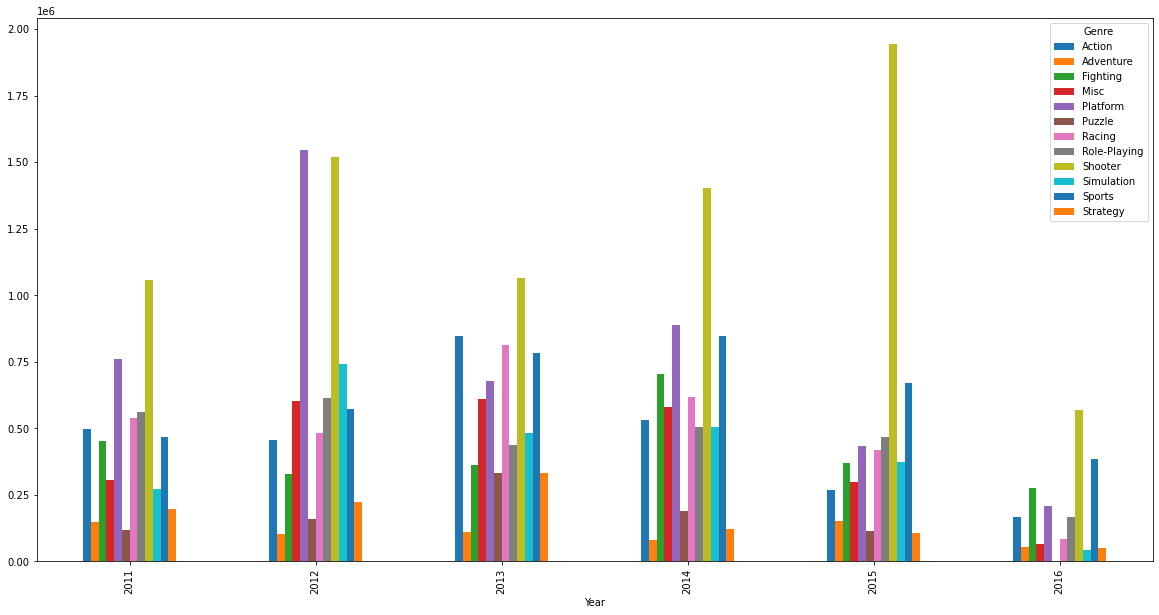

In [120]:
sales_of_year_genre.plot(kind='bar', figsize=(20, 10))

In [121]:
sales_of_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,264892.040716,158433.065083,48306.600864,56752.004318
Adventure,80251.968504,50165.354331,40858.267717,13149.606299
Fighting,263892.213174,119640.718563,104359.281437,43293.413174
Misc,234774.192375,123284.457478,61102.639296,42662.756012
Platform,509588.099542,229576.657895,149347.824943,58867.276888
Puzzle,214426.805996,89029.982363,99188.712522,21940.035273
Racing,290737.702459,192647.540164,46163.934426,62713.114754
Role-Playing,217435.197135,124897.679400,233922.236698,38697.135061
Shooter,448812.497656,242367.184375,29828.125000,79578.125000


In [122]:
sales_of_genre.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [123]:
na_sales_list = []

for i in range(len(sales_of_genre)):
  ratio_sample = sales_of_genre.NA_Sales.iloc[i] / sales_of_genre.NA_Sales.sum()
  na_sales_list.append(round(ratio_sample, 3))  

na_sales_list

[0.085,
 0.026,
 0.084,
 0.075,
 0.163,
 0.069,
 0.093,
 0.069,
 0.143,
 0.068,
 0.093,
 0.032]

In [124]:
na_sales_list = np.array(na_sales_list)

In [125]:
a = pd.DataFrame(data=na_sales_list, columns=['NA_Sales'], index=sales_of_genre.index)

In [126]:
a.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [127]:
a

,NA_Sales
Genre,
Action,0.085
Adventure,0.026
Fighting,0.084
Misc,0.075
Platform,0.163
Puzzle,0.069
Racing,0.093
Role-Playing,0.069
Shooter,0.143


In [128]:
a = a * 100

In [129]:
b = np.array(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


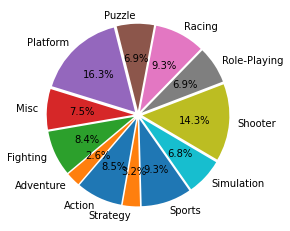

In [130]:
from math import exp
ratio = b
labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()

In [131]:
na_sales_list = []

for i in range(len(sales_of_genre)):
  ratio_sample = sales_of_genre.NA_Sales.iloc[i] / sales_of_genre.NA_Sales.sum()
  na_sales_list.append(round(ratio_sample, 3))  

na_sales_list = np.array(na_sales_list)

In [132]:
sales_of_genre.NA_Sales.iloc[0]/ sales_of_genre.NA_Sales.sum() 

0.08462796914092477

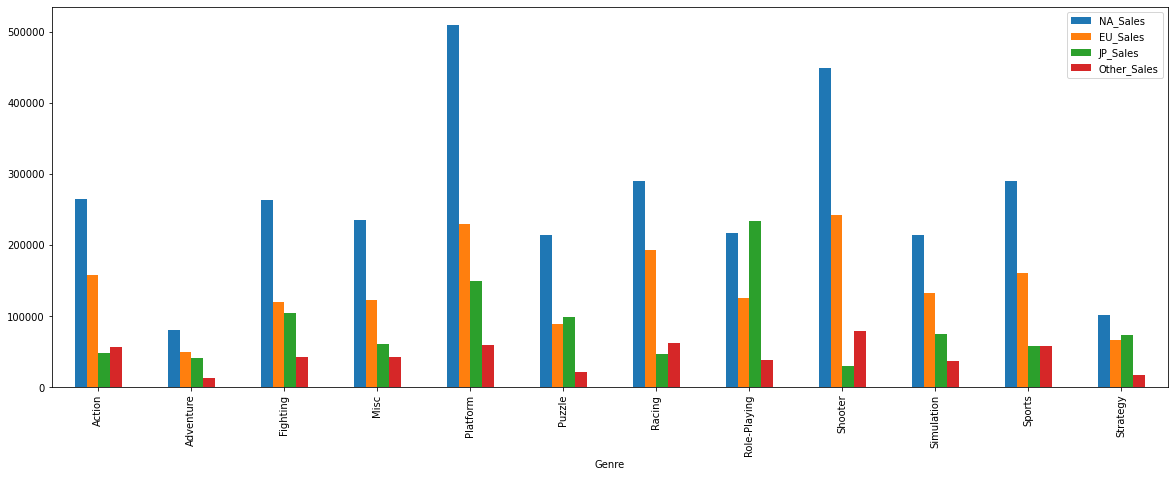

In [133]:
sales_of_genre.plot(kind='bar', figsize=(20, 7))

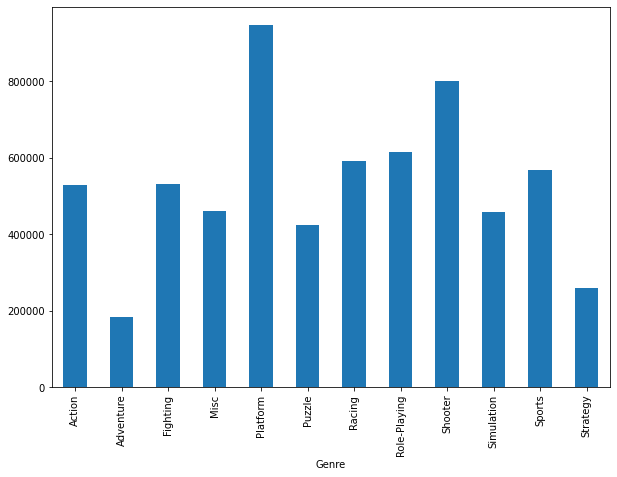

In [134]:
total_sales_of_genre.plot(kind='bar', figsize=(10,7))

In [135]:
df_11_16

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
11734,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,Disney Interactive Studios,370000,490000,0,100000,960000
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
11743,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000
4953,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...
5988,Homefront: The Revolution,XOne,2016,Shooter,Deep Silver,50000,70000,0,10000,130000
14785,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0,0,20000,0,20000
9546,Mirror's Edge Catalyst,PS4,2016,Platform,Electronic Arts,100000,140000,20000,60000,320000
1710,Rose to Tasogare no Kojou,PSV,2016,Action,Nippon Ichi Software,0,0,20000,0,20000


In [136]:
df_clean.total_sales.describe()

count    1.627700e+04
mean     5.384106e+05
std      1.562291e+06
min      0.000000e+00
25%      6.000000e+04
50%      1.700000e+05
75%      4.800000e+05
max      8.274000e+07
Name: total_sales, dtype: float64

In [137]:
df_clean[df_clean.total_sales == 8.274000e+07]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2943,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000


In [138]:
df_sort = df_clean.sort_values(by=['total_sales'], ascending=False)

In [139]:
df_sort = df_sort.reset_index(drop=True)

In [140]:
df_sort.iloc[:20]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
5,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
7,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
9,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000


In [141]:
df_11_16_sort = df_11_16.sort_values(by=['total_sales'], ascending=False)

In [142]:
df_11_16_sort

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
3500,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
10744,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
2846,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000
8951,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000,5810000,350000,2310000,14240000
4234,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000,5880000,650000,2520000,14040000
...,...,...,...,...,...,...,...,...,...,...
9722,Fit & Fun,Wii,2011,Sports,Unknown,0,10000,0,0,10000
741,Total War Attila: Tyrants & Kings,PC,2016,Strategy,Koch Media,0,10000,0,0,10000
16051,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,2016,Adventure,Prototype,0,0,10000,0,10000
8993,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,10000,0,0,0,10000


In [143]:
df_11_16_sort = df_11_16_sort.reset_index(drop=True)

In [144]:
df_11_16_sort.shape

(3872, 10)

In [145]:
df_11_16_sort.iloc[:20]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000,5810000,350000,2310000,14240000
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000,5880000,650000,2520000,14040000
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000,4300000,70000,1120000,13740000
6,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000,5820000,490000,1620000,13470000
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000,3910000,2670000,890000,12210000
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000,11990000
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230000,3370000,3080000,650000,11330000


In [146]:
df_11_16_sort[df_11_16_sort.Publisher == 'Take-Two Interactive']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000,11990000
48,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2660000,2009999,0,410000,5079999
78,NBA 2K16,PS4,2015,Sports,Take-Two Interactive,2480000,650000,30000,690000,3850000
...,...,...,...,...,...,...,...,...,...,...
3032,Major League Baseball 2K12,PC,2012,Sports,Take-Two Interactive,40000,0,0,0,40000
3043,MLB 2K12 / NBA 2K12 Combo Pack,X360,2012,Sports,Take-Two Interactive,40000,0,0,0,40000
3321,NBA 2K13,PC,2012,Sports,Take-Two Interactive,0,20000,0,0,20000
3426,XCOM 2,XOne,2016,Strategy,Take-Two Interactive,10000,10000,0,0,20000


In [147]:
df_sort[df_sort.Publisher == 'Valve']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
1010,Portal 2,PS3,2011,Shooter,Valve,830000,630000,20000,250000,1730000


In [148]:
df_11_16_sort[df_11_16_sort.Publisher == 'Nintendo']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000,3910000,2670000,890000,12210000
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230000,3370000,3080000,650000,11330000
10,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4890000,2990000,2130000,780000,10790000
13,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3660000,3070000,2470000,630000,9830000
17,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2009999,2320000,4360000,410000,9099999
...,...,...,...,...,...,...,...,...,...,...
3420,Teddy Together,3DS,2016,Simulation,Nintendo,0,20000,0,0,20000
3632,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0,0,10000,0,10000
3759,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0,0,10000,0,10000
3818,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,Nintendo,0,10000,0,0,10000


In [149]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  int64 
 6   EU_Sales     16277 non-null  int64 
 7   JP_Sales     16277 non-null  int64 
 8   Other_Sales  16277 non-null  int64 
 9   total_sales  16277 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.2+ MB


In [150]:
df_clean.total_sales = df_clean.total_sales.astype('int')

In [151]:
df_sample = np.array(df_clean.total_sales)

In [152]:
df_sample

array([180000, 900000, 820000, ..., 790000, 380000, 170000])

In [153]:
pop_ratio = df_clean.total_sales.mean()
pop_ratio

538410.6382011427

In [154]:
pop_var = df_clean.total_sales.var()
pop_var

2440754220956.227

In [155]:
sample_of_200 = []

np.random.seed(10)

for _ in range(10000):
  sample = np.random.choice(df_sample, 200, replace=True)
  sample_of_200.append(sample.mean())

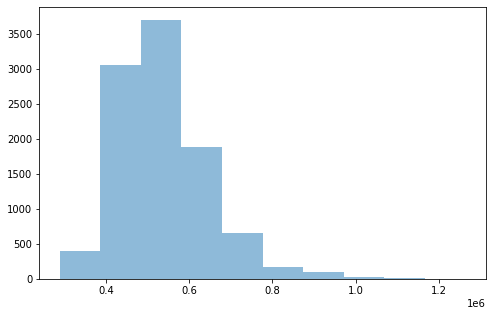

In [156]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_200, alpha=0.5);

In [157]:
sample_of_1000 = []

np.random.seed(10)

for _ in range(10000):
  sample = np.random.choice(df_sample, 1000, replace=True)
  sample_of_1000.append(sample.mean())

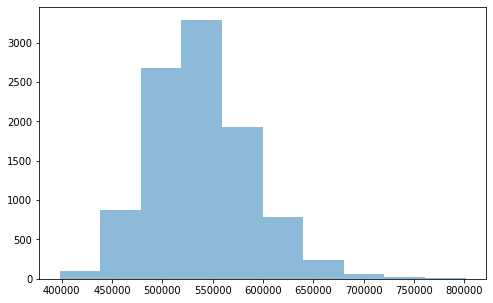

In [158]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_1000, alpha=0.5);

In [159]:
sample_of_200 = np.array(sample_of_200) 

In [160]:
mean_of_200 = sample_of_200.mean()
mean_of_200

537268.72744

In [161]:
sample_of_10000 = []

np.random.seed(10)

for _ in range(10000):
  sample = np.random.choice(df_sample, 10000, replace=True)
  sample_of_10000.append(sample.mean())

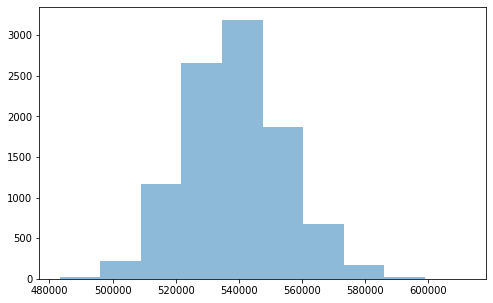

In [162]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_10000, alpha=0.5);

In [163]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [164]:
# 2011년도 게임 판매량 평균
df_2011 = df_clean[df_clean.Year == 2011]

In [165]:
df_2011.sort_values(by='total_sales', ascending=False) # 가장 판매량이 많은 장르는 shooter 이다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2846,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000
13862,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000,5820000,490000,1620000,13470000
10949,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000,3910000,2670000,890000,12210000
12405,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4890000,2990000,2130000,780000,10790000
317,Just Dance 3,Wii,2011,Misc,Ubisoft,6050000,3150000,0,1070000,10270000
...,...,...,...,...,...,...,...,...,...,...
5313,IGT Slots: Lucky Larry's Lobstermania,PC,2011,Simulation,Masque Publishing,10000,0,0,0,10000
13017,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011,Puzzle,Unknown,10000,0,0,0,10000
12907,Outdoors Unleashed: Alaska 3D,3DS,2011,Sports,Mastiff,10000,0,0,0,10000
12892,Tobidase! Kagaku-kun Chikyuu Daitanken! Nazo n...,DS,2011,Misc,Namco Bandai Games,0,0,10000,0,10000


In [166]:
df_2011_gen = df_2011.groupby('Genre')['total_sales'].mean()

In [167]:
df_2011_gen = pd.DataFrame(df_2011_gen, columns=['total_sales'])

In [168]:
df_2011.total_sales.mean()

453380.2799295775

In [169]:
import random
random.seed(1)

means = []

for _ in range(10000):
  bootsample = df_2011[df_2011['Genre'] == 'Shooter'].sample(150, replace=True)
  means.append(bootsample.total_sales.mean())

In [170]:
low, upper = np.percentile(means, 2.5), np.percentile(means, 97.5)
print(low, upper)

719728.3333333334 1454666.6666666667


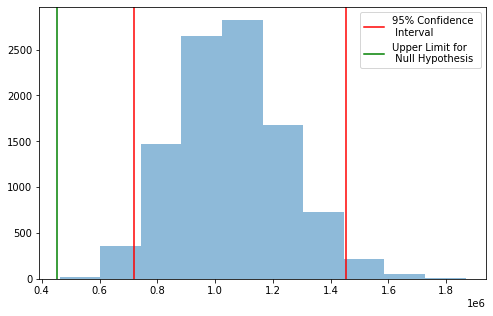

In [171]:
plt.figure(figsize=(8,5))
plt.hist(means, alpha=0.5)
plt.axvline(x=low, color='r')
plt.axvline(x=upper, color='r', label='95% Confidence \n Interval')
plt.axvline(x=453380.2799295775, color='g', label = 'Upper Limit for \n Null Hypothesis')
plt.legend(fontsize=10);

In [172]:
asdf1 = df_sort.iloc[:20] 
asdf1
# 1980 ~ 2020년도까지 판매량수로 데이터를 분석하였을 때 15위까지의 제작사는 동일하게 nintendo인것을 확인 할수 있고, 
# Will Sports는 역대 단일 플랫폼, 단일 타이틀(확장 팩 제외)로서 세상에서 가장 많이 팔린 게임이다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
5,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
7,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
9,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000


In [173]:
asdf12 = asdf1.loc[:, ['Name', 'total_sales']]

In [174]:
asdf12 = asdf12.set_index('Name')

In [175]:
asdf12

,total_sales
Name,
Wii Sports,82740000
Super Mario Bros.,40240000
Mario Kart Wii,35830000
Wii Sports Resort,33000000
Pokemon Red/Pokemon Blue,31380000
Tetris,30260000
New Super Mario Bros.,30010000
Wii Play,29010000
New Super Mario Bros. Wii,28610000


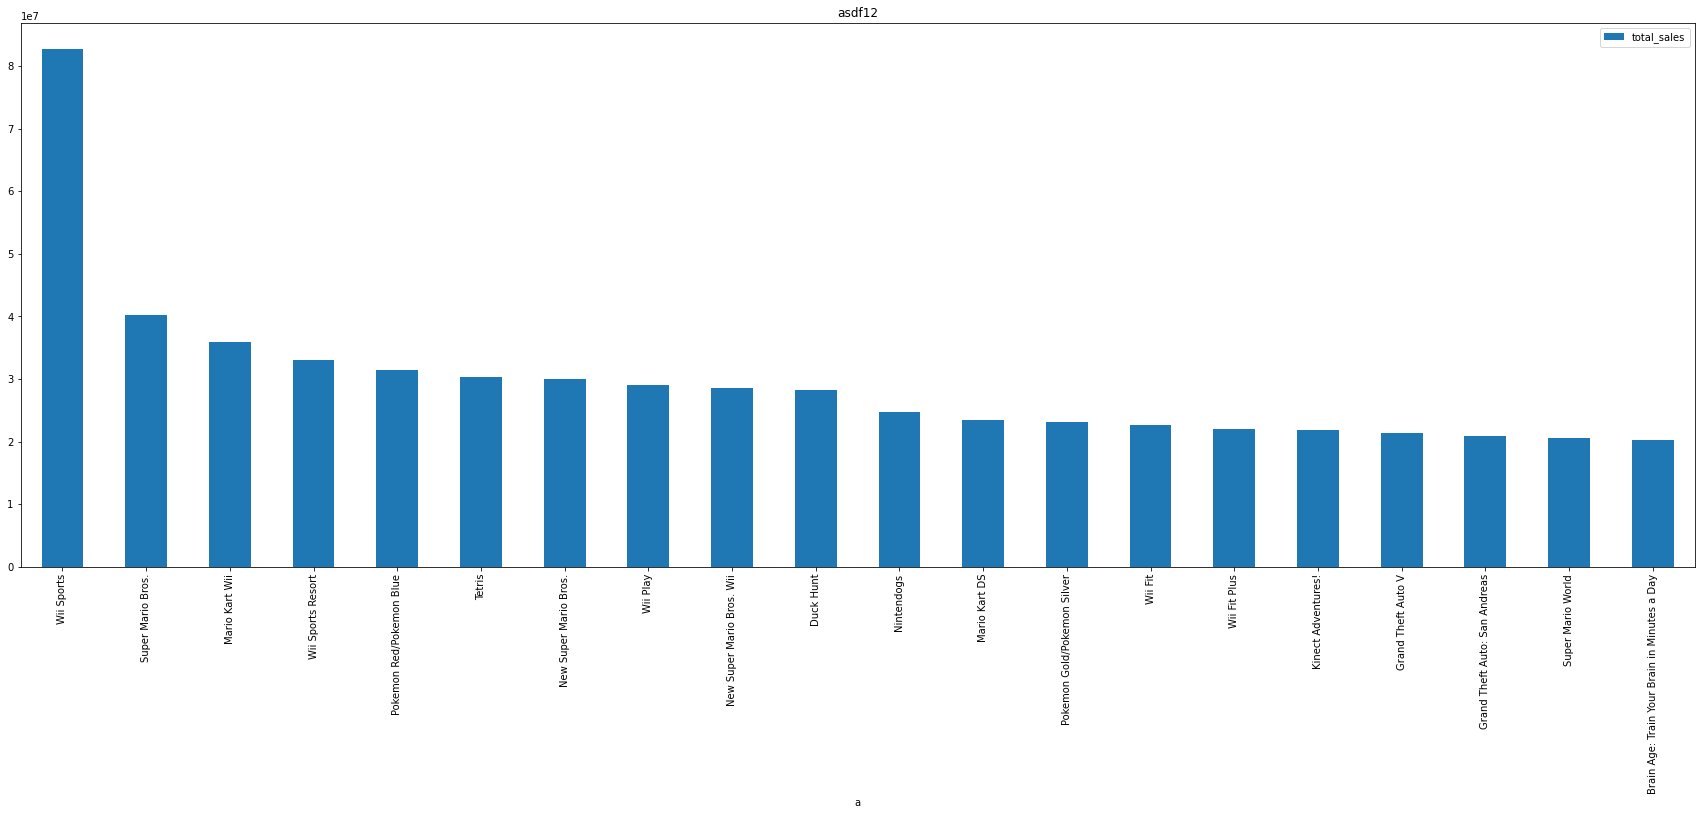

In [176]:
asdf12.plot(kind='bar', figsize=(30, 10), title='asdf12', xlabel='a')

In [177]:
gta5 = df_clean[df_clean.Name == 'Grand Theft Auto V']

In [178]:
df_11_16_sort.iloc[:20]
# 2011 - 2016년도까지의 판매량수의 데이터를 분석 한 것이다. 1980-2020년도까지의 판매량수와 비교 했을 때 다양한 제작사가 있고, 많은 플랫폼들이 보이는 것을 확인할 수 있다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000,5810000,350000,2310000,14240000
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000,5880000,650000,2520000,14040000
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000,4300000,70000,1120000,13740000
6,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000,5820000,490000,1620000,13470000
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000,3910000,2670000,890000,12210000
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000,11990000
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230000,3370000,3080000,650000,11330000


In [179]:
gta5 = df_clean[df_clean.Name == 'Grand Theft Auto V']
gta5.total_sales.sum()

55919998

In [180]:
gta5.total_sales.sum()

55919998

In [181]:
ubisoft = df_clean[df_clean.Publisher == 'Ubisoft']

In [182]:
ubisoft = ubisoft.sort_values(by='total_sales', ascending=False)

In [183]:
ubisoft[ubisoft.Year >= 2013]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
4347,Watch Dogs,PS4,2014,Action,Ubisoft,1400000,1860000,110000,770000,4140000
2310,Far Cry 4,PS4,2014,Shooter,Ubisoft,1120000,2120000,100000,690000,4030000
9378,Assassin's Creed: Unity,PS4,2014,Action,Ubisoft,1180000,1960000,80000,700000,3920000
16018,Assassin's Creed IV: Black Flag,PS3,2013,Action,Ubisoft,1330000,1710000,130000,730000,3900000
4035,Just Dance 2014,Wii,2013,Misc,Ubisoft,1980000,1470000,0,320000,3770000
...,...,...,...,...,...,...,...,...,...,...
348,Rugby World Cup 2015,PC,2015,Sports,Ubisoft,0,10000,0,0,10000
3897,Tetris Ultimate,PSV,2014,Puzzle,Ubisoft,0,10000,0,0,10000
227,Rabbids Invasion: The Interactive TV Show,PS4,2014,Misc,Ubisoft,0,10000,0,0,10000
15770,Rabbids Invasion: The Interactive TV Show,XOne,2014,Misc,Ubisoft,0,10000,0,0,10000


In [184]:
# 1. 지역에 따라서 선호하는 장르가 다를까?

In [185]:
asdf = np.array(df_clean.total_sales)

In [186]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [187]:
df_a = df_clean[df_clean.Genre == 'Shooter']

In [188]:
df_a

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
5,Virtua Cop,SAT,1995,Shooter,Sega,0,0,620000,0,620000
18,Wolfenstein,PC,2009,Shooter,Activision,10000,30000,0,10000,50000
21,Rogue Warrior,PS3,2009,Shooter,Bethesda Softworks,110000,20000,0,10000,140000
24,SOCOM: U.S. Navy SEALs Fireteam Bravo 2,PSP,2006,Shooter,Sony Computer Entertainment,810000,110000,0,130000,1050000
30,NPPL: Championship Paintball 2009,PS2,2008,Shooter,Activision Value,130000,100000,0,30000,260000
...,...,...,...,...,...,...,...,...,...,...
16231,Syphon Filter 3,PS,2001,Shooter,Sony Computer Entertainment,290000,200000,0,30000,520000
16232,BloodRayne,XB,2002,Shooter,Universal Interactive,160000,50000,0,10000,220000
16233,Left 4 Dead,X360,2008,Shooter,Electronic Arts,2660000,500000,50000,300000,3510000
16264,Bionicle Heroes,DS,2006,Shooter,Eidos Interactive,60000,0,0,0,60000


In [189]:
df_a = df_a.iloc[:, 5:]

In [190]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z = scaler.fit_transform(df_a)

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
Z

array([[-0.37024683, -0.4374144 ,  5.70408216, -0.39509255, -0.09843682],
       [-0.36199735, -0.38327162, -0.28829242, -0.34544416, -0.40914201],
       [-0.27950258, -0.40131921, -0.28829242, -0.34544416, -0.36008329],
       ...,
       [ 1.824114  ,  0.46496519,  0.1949636 ,  1.09435905,  1.476893  ],
       [-0.32074997, -0.4374144 , -0.28829242, -0.39509255, -0.40369104],
       [-0.31250049, -0.29303366, -0.28829242, -0.24614739, -0.33827942]])

In [193]:
scaler = MinMaxScaler()
df_a = scaler.fit_transform(df_a)

In [194]:
Z

array([[-0.37024683, -0.4374144 ,  5.70408216, -0.39509255, -0.09843682],
       [-0.36199735, -0.38327162, -0.28829242, -0.34544416, -0.40914201],
       [-0.27950258, -0.40131921, -0.28829242, -0.34544416, -0.36008329],
       ...,
       [ 1.824114  ,  0.46496519,  0.1949636 ,  1.09435905,  1.476893  ],
       [-0.32074997, -0.4374144 , -0.28829242, -0.39509255, -0.40369104],
       [-0.31250049, -0.29303366, -0.28829242, -0.24614739, -0.33827942]])

In [195]:
df_a = pd.DataFrame(df_a)

In [196]:
df_a

,0,1,2,3,4
0,0.000000,0.000000,0.430556,0.000000,0.021555
1,0.000371,0.005102,0.000000,0.003968,0.001413
2,0.004085,0.003401,0.000000,0.003968,0.004594
3,0.030078,0.018707,0.000000,0.051587,0.036749
4,0.004827,0.017007,0.000000,0.011905,0.008834
...,...,...,...,...,...
1275,0.010769,0.034014,0.000000,0.011905,0.018021
1276,0.005941,0.008503,0.000000,0.003968,0.007420
1277,0.098775,0.085034,0.034722,0.119048,0.123675
1278,0.002228,0.000000,0.000000,0.000000,0.001767


In [197]:
df_a.iloc[:,0]

0       0.000000
1       0.000371
2       0.004085
3       0.030078
4       0.004827
          ...   
1275    0.010769
1276    0.005941
1277    0.098775
1278    0.002228
1279    0.002599
Name: 0, Length: 1280, dtype: float64

In [198]:
group_1 = np.array(df_a.iloc[:,0])
group_2 = np.array(df_a.iloc[:,1])
group_3 = np.array(df_a.iloc[:,2])
group_4 = np.array(df_a.iloc[:,3])

In [199]:
group_1

array([0.        , 0.00037133, 0.00408466, ..., 0.0987746 , 0.002228  ,
       0.00259933])

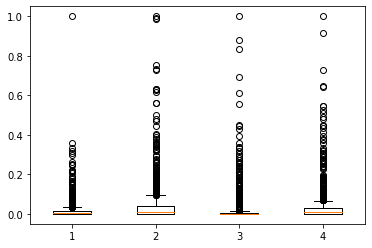

In [200]:
plot_data2 = [group_1, group_2, group_3, group_4]
ax = plt.boxplot(plot_data2)
plt.show()

In [201]:
group_1.mean()

0.016665892969040103

In [202]:
group_2.mean()

0.041218908907312925

In [203]:
df_b = df_clean[df_clean.Genre == 'Sports']

In [204]:
df_b = df_b.iloc[:, 5:]

In [205]:
scaler = MinMaxScaler()
df_b = scaler.fit_transform(df_b)

In [206]:
df_b = pd.DataFrame(df_b)

In [207]:
groupb_1 = np.array(df_b.iloc[:,0])
groupb_2 = np.array(df_b.iloc[:,1])
groupb_3 = np.array(df_b.iloc[:,2])
groupb_4 = np.array(df_b.iloc[:,3])

In [208]:
np.random.seed(44)

sample_of_1000 = []

for _ in range(10000):
  sample = np.random.choice(df_clean.NA_Sales, 1000, replace=True)
  sample_of_1000.append(sample.mean())

(array([9.500e+01, 1.231e+03, 3.388e+03, 3.138e+03, 1.500e+03, 4.990e+02,
        1.110e+02, 3.400e+01, 3.000e+00, 1.000e+00]),
 array([191250.    , 214385.9999, 237521.9998, 260657.9997, 283793.9996,
        306929.9995, 330065.9994, 353201.9993, 376337.9992, 399473.9991,
        422609.999 ]),
 <a list of 10 Patch objects>)

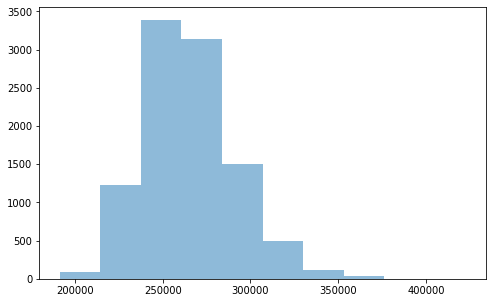

In [209]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_1000, alpha=0.5)

In [210]:
np.random.seed(44)

sample_of_100 = []

for _ in range(10000):
  sample = np.random.choice(group_1, 10, replace=True)
  sample_of_100.append(sample.mean())

In [211]:
sample_of_100 = np.array(sample_of_100)

(array([6.083e+03, 2.620e+03, 9.310e+02, 2.430e+02, 4.400e+01, 1.300e+01,
        2.000e+00, 4.900e+01, 1.100e+01, 4.000e+00]),
 array([0.00070553, 0.0151801 , 0.02965466, 0.04412922, 0.05860379,
        0.07307835, 0.08755291, 0.10202748, 0.11650204, 0.13097661,
        0.14545117]),
 <a list of 10 Patch objects>)

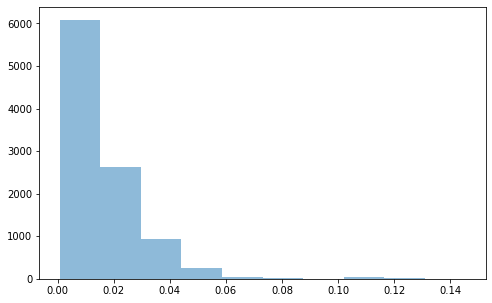

In [212]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_100, alpha=0.5)

In [213]:
np.random.seed(44)

sample_of_100_2 = []

for _ in range(10000):
  sample = np.random.choice(group_2, 10, replace=True)
  sample_of_100_2.append(sample.mean())

In [214]:
sample_of_100_2 = np.array(sample_of_100_2)

In [215]:
np.random.seed(44)

sample_of_100_3 = []

for _ in range(10000):
  sample = np.random.choice(group_3, 10, replace=True)
  sample_of_100_3.append(sample.mean())

In [216]:
sample_of_100_3 = np.array(sample_of_100_3)

In [217]:
np.random.seed(44)

sample_of_100_4 = []

for _ in range(10000):
  sample = np.random.choice(group_4, 10, replace=True)
  sample_of_100_4.append(sample.mean())

In [218]:
sample_of_100_4 = np.array(sample_of_100_4)

In [219]:
sample_of_100.mean()

0.016637103513182323

In [220]:
sample_of_100.var()

0.0001909494750034617

# 2) 데이터 분석 및 시각화 프로세스

##  Q1. 지역에 따라서 선호하는 게임 장르가 다를까?

### 지역별 게임 장르별 판매량 시각화

In [221]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [222]:
df_genre_na = df_clean.groupby('Genre')['NA_Sales'].sum()
df_genre_eu = df_clean.groupby('Genre')['EU_Sales'].sum()
df_genre_jp = df_clean.groupby('Genre')['JP_Sales'].sum()
df_genre_other = df_clean.groupby('Genre')['Other_Sales'].sum()
df_genre_total = df_clean.groupby('Genre')['total_sales'].sum()
df_genre_locate = pd.DataFrame()
df_genre_locate = df_genre_locate.append(df_genre_na)
df_genre_locate = df_genre_locate.append(df_genre_eu)
df_genre_locate = df_genre_locate.append(df_genre_jp)
df_genre_locate = df_genre_locate.append(df_genre_other)
df_genre_locate = df_genre_locate.append(df_genre_total)
df_genre_locate

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,8.587800e+08,101920000.0,220349998.0,400289998.0,445379999.0,121579999.0,354699997.0,318759999.0,5.744800e+08,181429998.0,6.672600e+08,67890000.0
EU_Sales,5.136400e+08,63710000.0,99900000.0,210200000.0,200649999.0,50480000.0,235029999.0,183099998.0,3.102300e+08,113170000.0,3.709700e+08,44920000.0
JP_Sales,1.566100e+08,51890000.0,87140000.0,104180000.0,130529999.0,56240000.0,56320000.0,342929999.0,3.818000e+07,63540000.0,1.347600e+08,49100000.0
Other_Sales,1.839900e+08,16700000.0,36150000.0,72739999.0,51450000.0,12440000.0,76510000.0,56730000.0,1.018600e+08,31320000.0,1.323500e+08,11230000.0
total_sales,1.713020e+09,234220000.0,443539998.0,787409997.0,828009997.0,240739999.0,722559996.0,901519996.0,1.024750e+09,389459998.0,1.305340e+09,173140000.0


In [223]:
df_genre_locate = df_genre_locate.T

In [224]:
df_genre_locate

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Action,858779996.0,513639997.0,156610000.0,183989998.0,1.713020e+09
Adventure,101920000.0,63710000.0,51890000.0,16700000.0,2.342200e+08
Fighting,220349998.0,99900000.0,87140000.0,36150000.0,4.435400e+08
Misc,400289998.0,210200000.0,104180000.0,72739999.0,7.874100e+08
Platform,445379999.0,200649999.0,130529999.0,51450000.0,8.280100e+08
Puzzle,121579999.0,50480000.0,56240000.0,12440000.0,2.407400e+08
Racing,354699997.0,235029999.0,56320000.0,76510000.0,7.225600e+08
Role-Playing,318759999.0,183099998.0,342929999.0,56730000.0,9.015200e+08
Shooter,574479997.0,310229996.0,38180000.0,101860000.0,1.024750e+09
Simulation,181429998.0,113170000.0,63540000.0,31320000.0,3.894600e+08


In [225]:
df_genre_locate_NA_Sales = df_genre_locate.sort_values(by='NA_Sales', ascending=False)

In [226]:
df_genre_locate_NA_Sales.iloc[:, :1].T

,Action,Sports,Shooter,Platform,Misc,Racing,Role-Playing,Fighting,Simulation,Puzzle,Adventure,Strategy
NA_Sales,858779996.0,667259996.0,574479997.0,445379999.0,400289998.0,354699997.0,318759999.0,220349998.0,181429998.0,121579999.0,101920000.0,67890000.0


In [227]:
df_genre_locate_EU_Sales = df_genre_locate.sort_values(by='EU_Sales', ascending=False)
df_genre_locate_EU_Sales.iloc[:, 1:2].T

,Action,Sports,Shooter,Racing,Misc,Platform,Role-Playing,Simulation,Fighting,Adventure,Puzzle,Strategy
EU_Sales,513639997.0,370969999.0,310229996.0,235029999.0,210200000.0,200649999.0,183099998.0,113170000.0,99900000.0,63710000.0,50480000.0,44920000.0


In [228]:
df_genre_locate_JP_Sales = df_genre_locate.sort_values(by='JP_Sales', ascending=False)
df_genre_locate_JP_Sales.iloc[:, 2:3].T

,Role-Playing,Action,Sports,Platform,Misc,Fighting,Simulation,Racing,Puzzle,Adventure,Strategy,Shooter
JP_Sales,342929999.0,156610000.0,134759999.0,130529999.0,104180000.0,87140000.0,63540000.0,56320000.0,56240000.0,51890000.0,49100000.0,38180000.0


In [229]:
df_genre_locate_Other_Sales = df_genre_locate.sort_values(by='Other_Sales', ascending=False)
df_genre_locate_Other_Sales.iloc[:, 3:4].T

,Action,Sports,Shooter,Racing,Misc,Role-Playing,Platform,Fighting,Simulation,Adventure,Puzzle,Strategy
Other_Sales,183989998.0,132349999.0,101860000.0,76510000.0,72739999.0,56730000.0,51450000.0,36150000.0,31320000.0,16700000.0,12440000.0,11230000.0


In [230]:
df_genre_locate_total_Sales = df_genre_locate.sort_values(by='total_sales', ascending=False)
df_genre_locate_total_Sales.iloc[:, 4:5].T

,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
total_sales,1.713020e+09,1.305340e+09,1.024750e+09,901519996.0,828009997.0,787409997.0,722559996.0,443539998.0,389459998.0,240739999.0,234220000.0,173140000.0


In [231]:
df_genre_locate

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Action,858779996.0,513639997.0,156610000.0,183989998.0,1.713020e+09
Adventure,101920000.0,63710000.0,51890000.0,16700000.0,2.342200e+08
Fighting,220349998.0,99900000.0,87140000.0,36150000.0,4.435400e+08
Misc,400289998.0,210200000.0,104180000.0,72739999.0,7.874100e+08
Platform,445379999.0,200649999.0,130529999.0,51450000.0,8.280100e+08
Puzzle,121579999.0,50480000.0,56240000.0,12440000.0,2.407400e+08
Racing,354699997.0,235029999.0,56320000.0,76510000.0,7.225600e+08
Role-Playing,318759999.0,183099998.0,342929999.0,56730000.0,9.015200e+08
Shooter,574479997.0,310229996.0,38180000.0,101860000.0,1.024750e+09
Simulation,181429998.0,113170000.0,63540000.0,31320000.0,3.894600e+08


In [376]:
from scipy.stats import chi2_contingency

chi2_val, p, dof, expected= chi2_contingency(df_genre_locate, correction=False)
if(p<0.05) : 
    print('p value:', p,"\n"+'귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 지역마다 선호하는 장르가 같다.')

p value: 0.0 
귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.


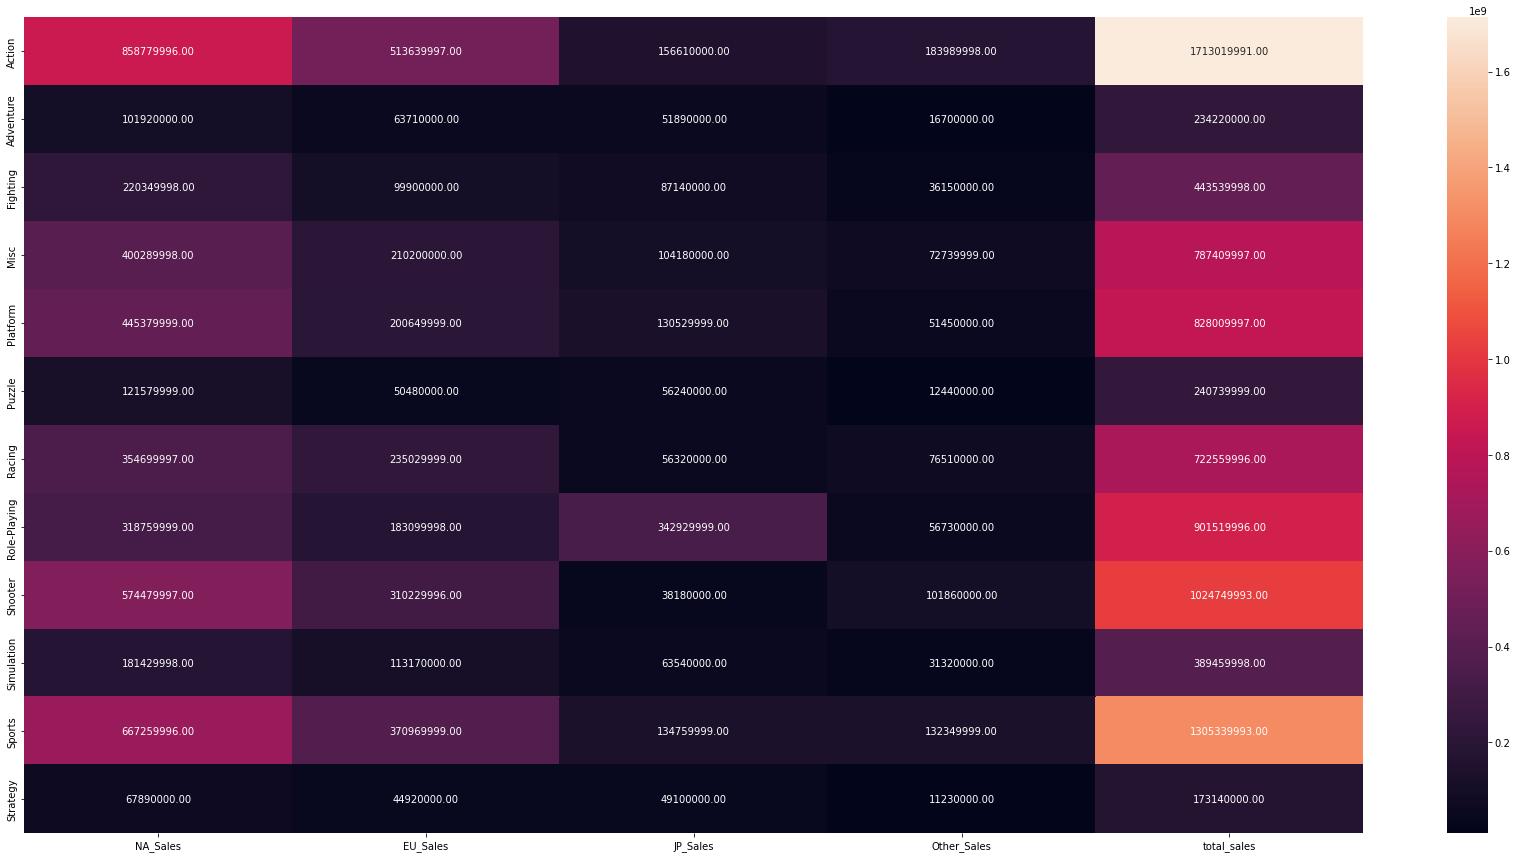

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 15))
locate_heatmap = sns.heatmap(df_genre_locate, annot=True, fmt='.2f')
plt.show()

In [233]:
df_genre_of_na_sales = df_clean.groupby('Genre', as_index=False)['NA_Sales'].sum()

In [234]:
df_genre_of_na_sales = pd.DataFrame(df_genre_of_na_sales)

In [235]:
df_genre_of_na_sales

,Genre,NA_Sales
0,Action,858779996
1,Adventure,101920000
2,Fighting,220349998
3,Misc,400289998
4,Platform,445379999
5,Puzzle,121579999
6,Racing,354699997
7,Role-Playing,318759999
8,Shooter,574479997
9,Simulation,181429998


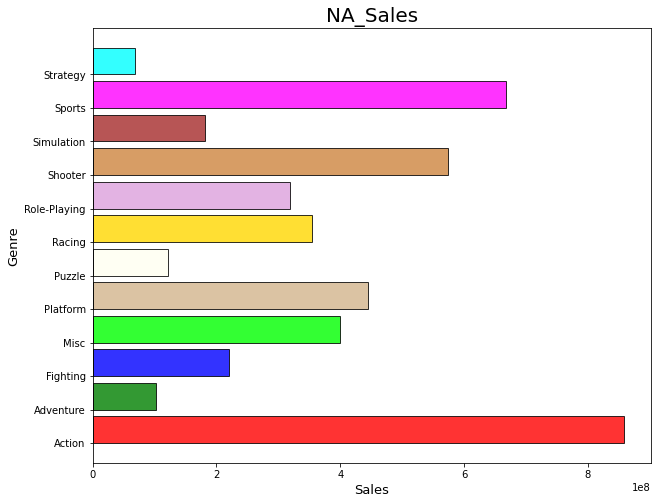

In [236]:
y = df_genre_of_na_sales.Genre
values = df_genre_of_na_sales.NA_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('NA_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

In [237]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [238]:
df_genre_of_eu_sales = df_clean.groupby('Genre', as_index=False)['EU_Sales'].sum()

In [239]:
df_genre_of_eu_sales = pd.DataFrame(df_genre_of_eu_sales)

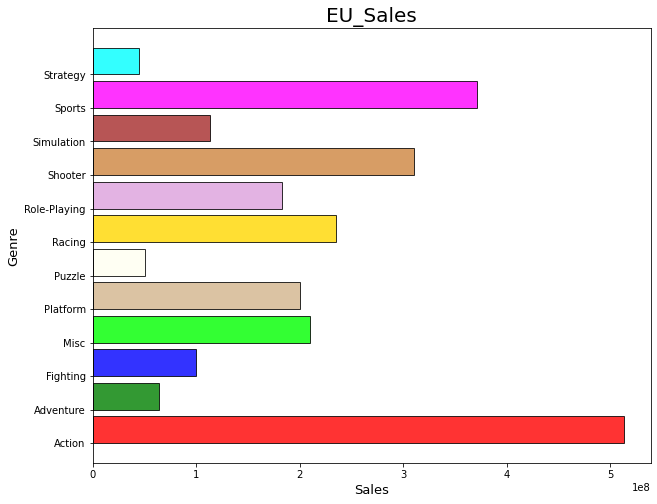

In [240]:
y = df_genre_of_eu_sales.Genre
values = df_genre_of_eu_sales.EU_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('EU_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

In [241]:
df_genre_of_jp_sales = df_clean.groupby('Genre', as_index=False)['JP_Sales'].sum()

In [242]:
df_genre_of_jp_sales = pd.DataFrame(df_genre_of_jp_sales)

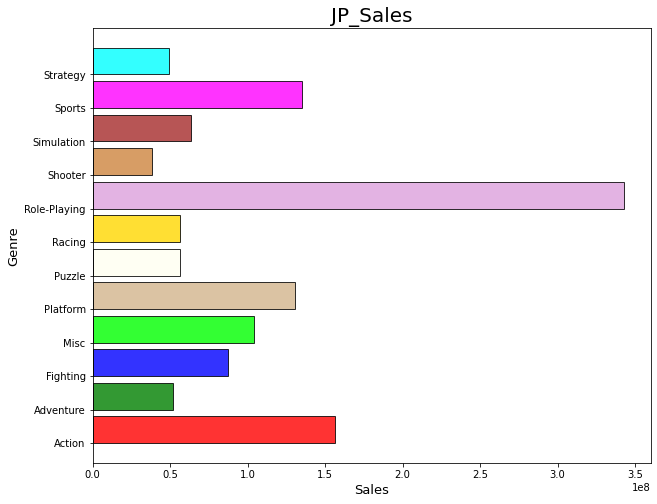

In [243]:
y = df_genre_of_jp_sales.Genre
values = df_genre_of_jp_sales.JP_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('JP_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

In [244]:
df_genre_of_other_sales = df_clean.groupby('Genre', as_index=False)['Other_Sales'].sum()

In [245]:
df_genre_of_other_sales = pd.DataFrame(df_genre_of_other_sales)

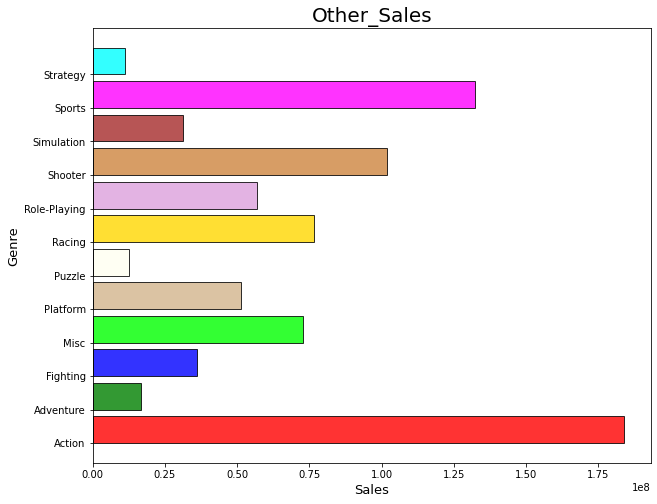

In [246]:
y = df_genre_of_other_sales.Genre
values = df_genre_of_other_sales.Other_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('Other_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

## Q2. 연도별 게임의 트렌드가 있을까?

NA_Sales : 북미
EU_Sales : 유럽
JP_Sales : 일본
Other_Sales : 그 외 국가

In [247]:
year_sales_NA = df_clean.groupby('Year')['NA_Sales'].sum()
year_sales_EU = df_clean.groupby('Year')['EU_Sales'].sum()
year_sales_JP = df_clean.groupby('Year')['JP_Sales'].sum()
year_sales_Other = df_clean.groupby('Year')['Other_Sales'].sum()

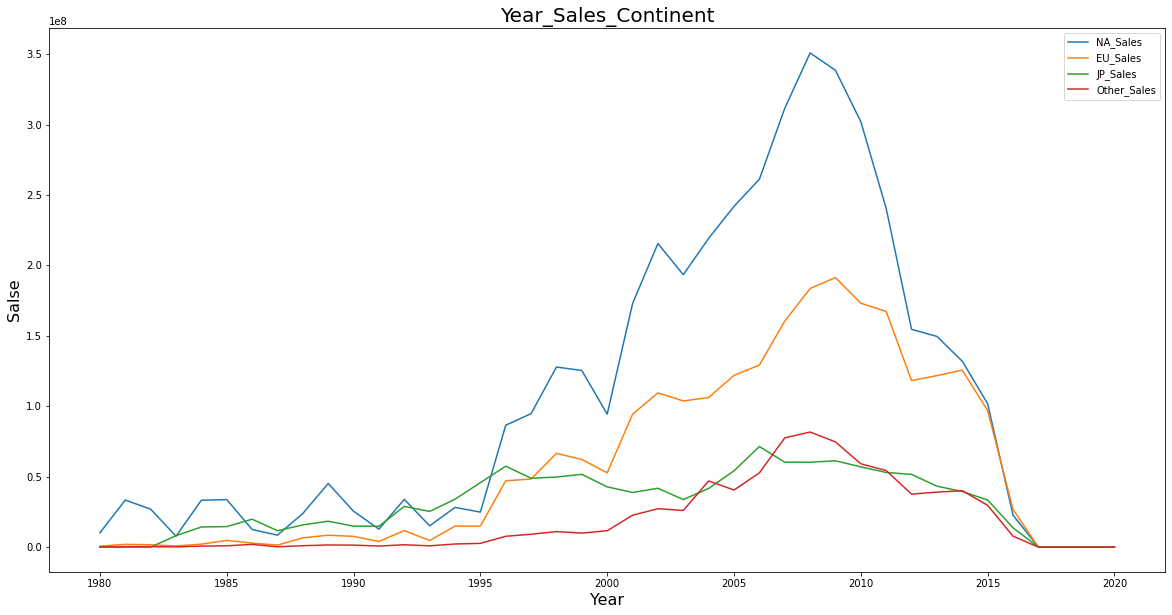

In [248]:
plt.figure(figsize=(20,10))
plt.plot(year_sales_NA.index, year_sales_NA)
plt.plot(year_sales_EU.index, year_sales_EU)
plt.plot(year_sales_JP.index, year_sales_JP)
plt.plot(year_sales_Other.index, year_sales_Other)

plt.title('Year_Sales_Continent', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()

In [249]:
genre_Action = df_clean[df_clean.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year')['total_sales'].sum()

genre_Sports = df_clean[df_clean.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year')['total_sales'].sum()

genre_Misc = df_clean[df_clean.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year')['total_sales'].sum()

genre_Role_Playing = df_clean[df_clean.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year')['total_sales'].sum()

In [250]:
df_clean.query("Year == 1980")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
5681,Asteroids,2600,1980,Shooter,Atari,4000000,260000,0,50000,4310000
5894,Kaboom!,2600,1980,Misc,Activision,1070000,70000,0,10000,1150000
7239,Checkers,2600,1980,Misc,Atari,220000,10000,0,0,230000
9104,Bridge,2600,1980,Misc,Activision,250000,20000,0,0,270000
9979,Defender,2600,1980,Misc,Atari,990000,50000,0,10000,1050000
12904,Freeway,2600,1980,Action,Activision,320000,20000,0,0,340000
14005,Boxing,2600,1980,Fighting,Activision,720000,40000,0,10000,770000
14738,Missile Command,2600,1980,Shooter,Atari,2560000,170000,0,30000,2760000


In [251]:
df_clean.Year.value_counts()

2009    1428
2008    1423
2010    1255
2007    1196
2011    1136
2006    1005
2005     939
2002     826
2003     774
2004     759
2012     654
2015     611
2014     582
2013     545
2001     480
1998     377
2000     348
2016     344
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

In [252]:
df_clean.Genre

0           Action
1           Racing
2        Adventure
3         Platform
4         Platform
           ...    
16272     Platform
16273       Action
16274       Sports
16275       Action
16276     Fighting
Name: Genre, Length: 16277, dtype: object

In [253]:
genre_Action = df_clean[df_clean.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year')['total_sales'].sum()

genre_Sports = df_clean[df_clean.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year')['total_sales'].sum()

genre_Misc = df_clean[df_clean.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year')['total_sales'].sum()

genre_Role_Playing = df_clean[df_clean.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year')['total_sales'].sum()

genre_Shooter = df_clean[df_clean.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year')['total_sales'].sum()

genre_Adventure = df_clean[df_clean.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year')['total_sales'].sum()

genre_Racing = df_clean[df_clean.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year')['total_sales'].sum()

genre_Platform = df_clean[df_clean.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year')['total_sales'].sum()

genre_Simulation = df_clean[df_clean.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year')['total_sales'].sum()

genre_Fighting = df_clean[df_clean.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year')['total_sales'].sum()

genre_Strategy = df_clean[df_clean.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year')['total_sales'].sum()

genre_Puzzle = df_clean[df_clean.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year')['total_sales'].sum()

In [254]:
genre_Action = df_clean[df_clean.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year')['total_sales'].sum()

In [255]:
genre_Sports = df_clean[df_clean.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year')['total_sales'].sum()

In [256]:
genre_Misc = df_clean[df_clean.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year')['total_sales'].sum()

In [257]:
genre_Role_Playing = df_clean[df_clean.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year')['total_sales'].sum()

In [258]:
genre_Shooter = df_clean[df_clean.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year')['total_sales'].sum()

In [259]:
genre_Adventure = df_clean[df_clean.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year')['total_sales'].sum()

In [260]:
genre_Racing = df_clean[df_clean.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year')['total_sales'].sum()

In [261]:
genre_Platform = df_clean[df_clean.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year')['total_sales'].sum()

In [262]:
genre_Simulation = df_clean[df_clean.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year')['total_sales'].sum()

In [263]:
genre_Fighting = df_clean[df_clean.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year')['total_sales'].sum()

In [264]:
genre_Strategy = df_clean[df_clean.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year')['total_sales'].sum()

In [265]:
genre_Puzzle = df_clean[df_clean.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year')['total_sales'].sum()

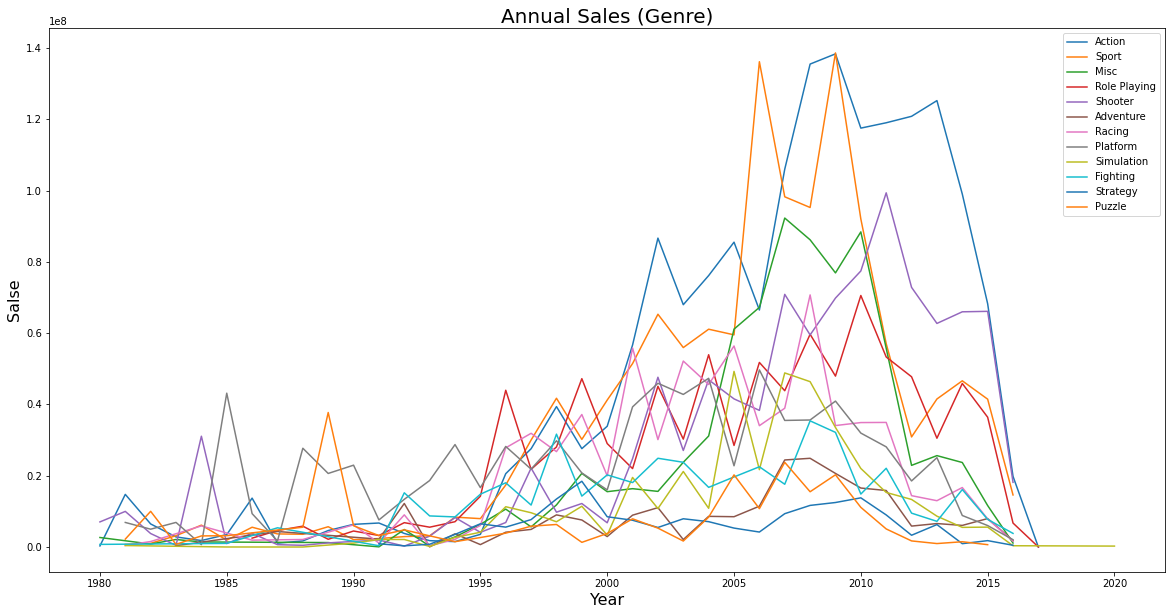

In [266]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('Annual Sales (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()


In [267]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [268]:
df_80_84 = df_clean[(df_clean.Year >= 1980) & (df_clean.Year < 1985)]

In [269]:
df_80_84_a = np.repeat('80_84', len(df_80_84))
df_80_84_a

array(['80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_

In [270]:
df_80_84['Year_5'] = df_80_84_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [271]:
df_85_89 = df_clean[(df_clean.Year >= 1985) & (df_clean.Year < 1990)]

In [272]:
df_85_89_a = np.repeat('85_89', len(df_85_89))

In [273]:
df_85_89['Year_5'] = df_85_89_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [274]:
df_90_94 = df_clean[(df_clean.Year >= 1990) & (df_clean.Year < 1995)]

In [275]:
df_90_94_a = np.repeat('90_94', len(df_90_94))

In [276]:
df_90_94['Year_5'] = df_90_94_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [277]:
df_95_99 = df_clean[(df_clean.Year >= 1995) & (df_clean.Year < 2000)]

In [278]:
df_95_99_a = np.repeat('95_99', len(df_95_99))

In [279]:
df_95_99['Year_5'] = df_95_99_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [280]:
df_00_04 = df_clean[(df_clean.Year >= 2000) & (df_clean.Year < 2005)]

In [281]:
df_00_04_a = np.repeat('00_04', len(df_00_04))

In [282]:
df_00_04['Year_5'] = df_00_04_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
df_05_09 = df_clean[(df_clean.Year >= 2005) & (df_clean.Year < 2010)]

In [284]:
df_05_09_a = np.repeat('05_09', len(df_05_09))

In [285]:
df_05_09['Year_5'] = df_05_09_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [286]:
df_10_20 = df_clean[(df_clean.Year >= 2010) & (df_clean.Year <= 2020)]

In [287]:
df_10_20_a = np.repeat('10_20', len(df_10_20))

In [288]:
df_10_20['Year_5'] = df_10_20_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [289]:
df_year_5 = pd.concat([df_80_84, df_85_89, df_90_94, df_95_99, df_00_04, df_05_09, df_10_20])

In [290]:
df_year_5_80_99 = pd.concat([df_80_84, df_85_89, df_90_94, df_95_99])

In [291]:
df_year_5_95_20 = pd.concat([df_95_99, df_00_04, df_05_09, df_10_20])

In [292]:
df_year_5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Year_5
136,Beamrider,2600,1984,Racing,Activision,260000,10000,0,0,270000,80_84
305,Mountain King,2600,1982,Action,CBS Electronics,290000,20000,0,0,310000,80_84
555,Baseball,NES,1983,Sports,Nintendo,730000,100000,2350000,20000,3200000,80_84
572,Mappy,NES,1984,Platform,Namco Bandai Games,0,0,690000,0,690000,80_84
752,Smurf: Rescue In Gargamel's Castle,2600,1981,Action,Coleco,550000,30000,0,10000,590000,80_84
...,...,...,...,...,...,...,...,...,...,...,...
16261,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000,120000,0,20000,270000,10_20
16267,MindJack,PS3,2011,Shooter,Square Enix,70000,80000,0,30000,180000,10_20
16269,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0,0,50000,0,50000,10_20
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000,10_20


In [293]:
genre_Action = df_year_5[df_year_5.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year_5')['total_sales'].sum()

genre_Sports = df_year_5[df_year_5.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year_5')['total_sales'].sum()

genre_Misc = df_year_5[df_year_5.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year_5')['total_sales'].sum()

genre_Role_Playing = df_year_5[df_year_5.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year_5')['total_sales'].sum()

genre_Shooter = df_year_5[df_year_5.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year_5')['total_sales'].sum()

genre_Adventure = df_year_5[df_year_5.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year_5')['total_sales'].sum()

genre_Racing = df_year_5[df_year_5.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year_5')['total_sales'].sum()

genre_Platform = df_year_5[df_year_5.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year_5')['total_sales'].sum()

genre_Simulation = df_year_5[df_year_5.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year_5')['total_sales'].sum()

genre_Fighting = df_year_5[df_year_5.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year_5')['total_sales'].sum()

genre_Strategy = df_year_5[df_year_5.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year_5')['total_sales'].sum()

genre_Puzzle = df_year_5[df_year_5.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year_5')['total_sales'].sum()

In [294]:
genre_Action_year = genre_Action_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Sports_year = genre_Sports_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Misc_year = genre_Misc_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Role_Playing_year = genre_Role_Playing_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Shooter_year = genre_Shooter_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Adventure_year = genre_Adventure_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Racing_year = genre_Racing_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Platform_year = genre_Platform_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Simulation_year = genre_Simulation_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Fighting_year = genre_Fighting_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Strategy_year = genre_Strategy_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Puzzle_year = genre_Puzzle_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])

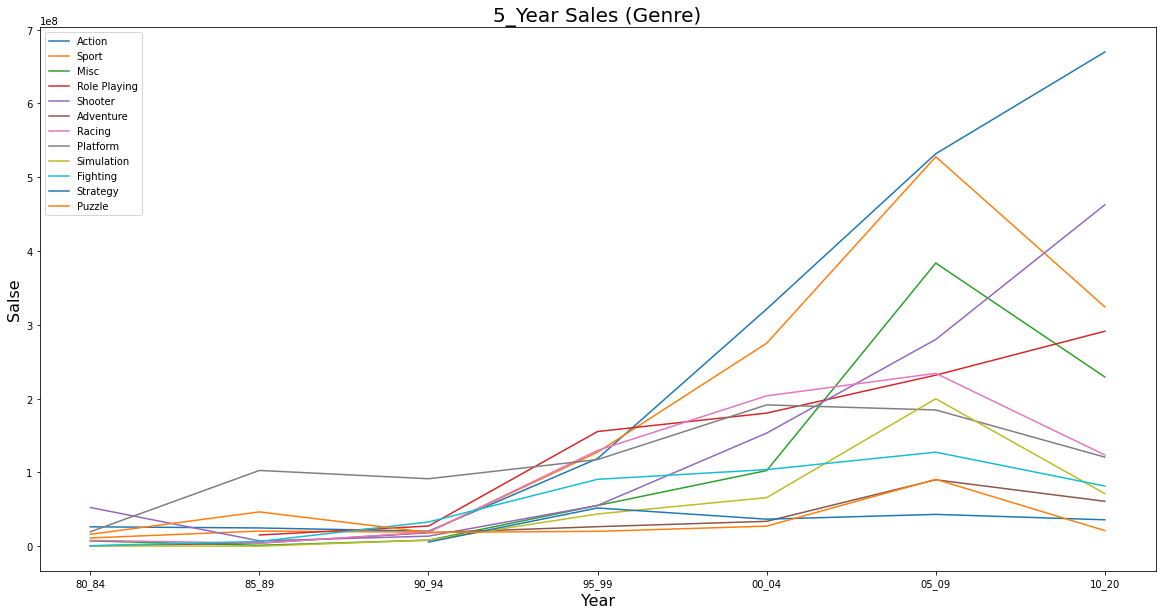

In [295]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('5_Year Sales (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()

In [296]:
genre_Action = df_year_5_80_99[df_year_5_80_99.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year_5')['total_sales'].sum()

genre_Sports = df_year_5_80_99[df_year_5_80_99.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year_5')['total_sales'].sum()

genre_Misc = df_year_5_80_99[df_year_5_80_99.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year_5')['total_sales'].sum()

genre_Role_Playing = df_year_5_80_99[df_year_5_80_99.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year_5')['total_sales'].sum()

genre_Shooter = df_year_5_80_99[df_year_5_80_99.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year_5')['total_sales'].sum()

genre_Adventure = df_year_5_80_99[df_year_5_80_99.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year_5')['total_sales'].sum()

genre_Racing = df_year_5_80_99[df_year_5_80_99.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year_5')['total_sales'].sum()

genre_Platform = df_year_5_80_99[df_year_5_80_99.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year_5')['total_sales'].sum()

genre_Simulation = df_year_5_80_99[df_year_5_80_99.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year_5')['total_sales'].sum()

genre_Fighting = df_year_5_80_99[df_year_5_80_99.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year_5')['total_sales'].sum()

genre_Strategy = df_year_5_80_99[df_year_5_80_99.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year_5')['total_sales'].sum()

genre_Puzzle = df_year_5_80_99[df_year_5_80_99.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year_5')['total_sales'].sum()

In [297]:
genre_Action_year = genre_Action_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Sports_year = genre_Sports_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Misc_year = genre_Misc_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Role_Playing_year = genre_Role_Playing_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Shooter_year = genre_Shooter_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Adventure_year = genre_Adventure_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Racing_year = genre_Racing_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Platform_year = genre_Platform_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Simulation_year = genre_Simulation_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Fighting_year = genre_Fighting_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Strategy_year = genre_Strategy_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Puzzle_year = genre_Puzzle_year.reindex(['80_84', '85_89', '90_94', '95_99'])

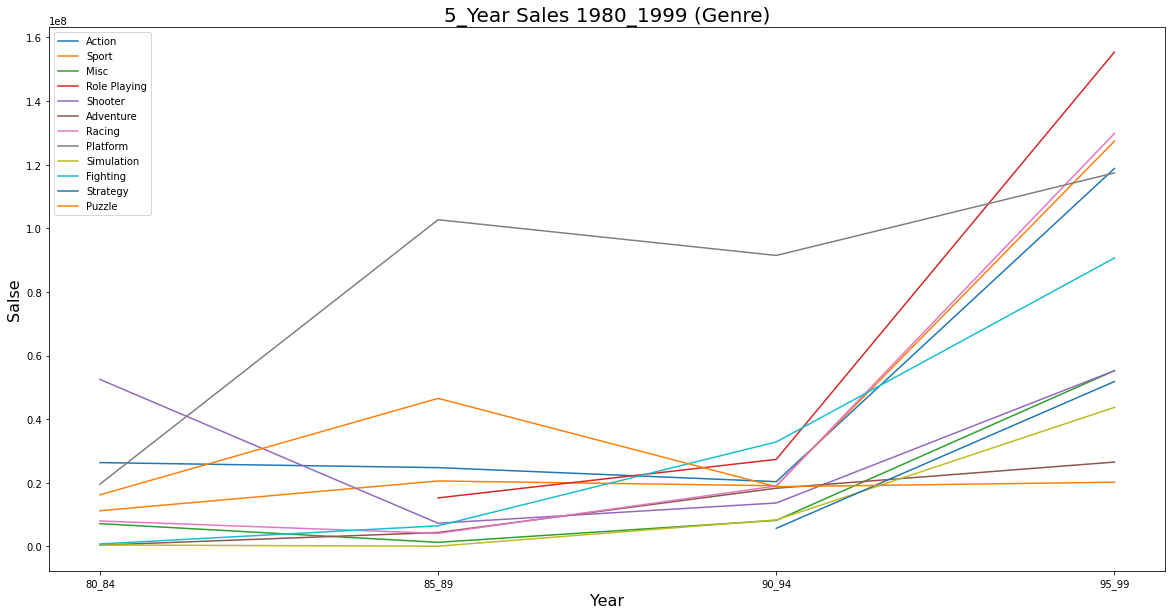

In [298]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('5_Year Sales 1980_1999 (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()

In [299]:
genre_Action = df_year_5_95_20[df_year_5_95_20.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year_5')['total_sales'].sum()

genre_Sports = df_year_5_95_20[df_year_5_95_20.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year_5')['total_sales'].sum()

genre_Misc = df_year_5_95_20[df_year_5_95_20.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year_5')['total_sales'].sum()

genre_Role_Playing = df_year_5_95_20[df_year_5_95_20.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year_5')['total_sales'].sum()

genre_Shooter = df_year_5_95_20[df_year_5_95_20.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year_5')['total_sales'].sum()

genre_Adventure = df_year_5_95_20[df_year_5_95_20.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year_5')['total_sales'].sum()

genre_Racing = df_year_5_95_20[df_year_5_95_20.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year_5')['total_sales'].sum()

genre_Platform = df_year_5_95_20[df_year_5_95_20.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year_5')['total_sales'].sum()

genre_Simulation = df_year_5_95_20[df_year_5_95_20.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year_5')['total_sales'].sum()

genre_Fighting = df_year_5_95_20[df_year_5_95_20.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year_5')['total_sales'].sum()

genre_Strategy = df_year_5_95_20[df_year_5_95_20.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year_5')['total_sales'].sum()

genre_Puzzle = df_year_5_95_20[df_year_5_95_20.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year_5')['total_sales'].sum()

In [300]:
genre_Action_year = genre_Action_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Sports_year = genre_Sports_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Misc_year = genre_Misc_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Role_Playing_year = genre_Role_Playing_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Shooter_year = genre_Shooter_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Adventure_year = genre_Adventure_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Racing_year = genre_Racing_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Platform_year = genre_Platform_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Simulation_year = genre_Simulation_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Fighting_year = genre_Fighting_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Strategy_year = genre_Strategy_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Puzzle_year = genre_Puzzle_year.reindex(['95_99', '00_04', '05_09', '10_20'])

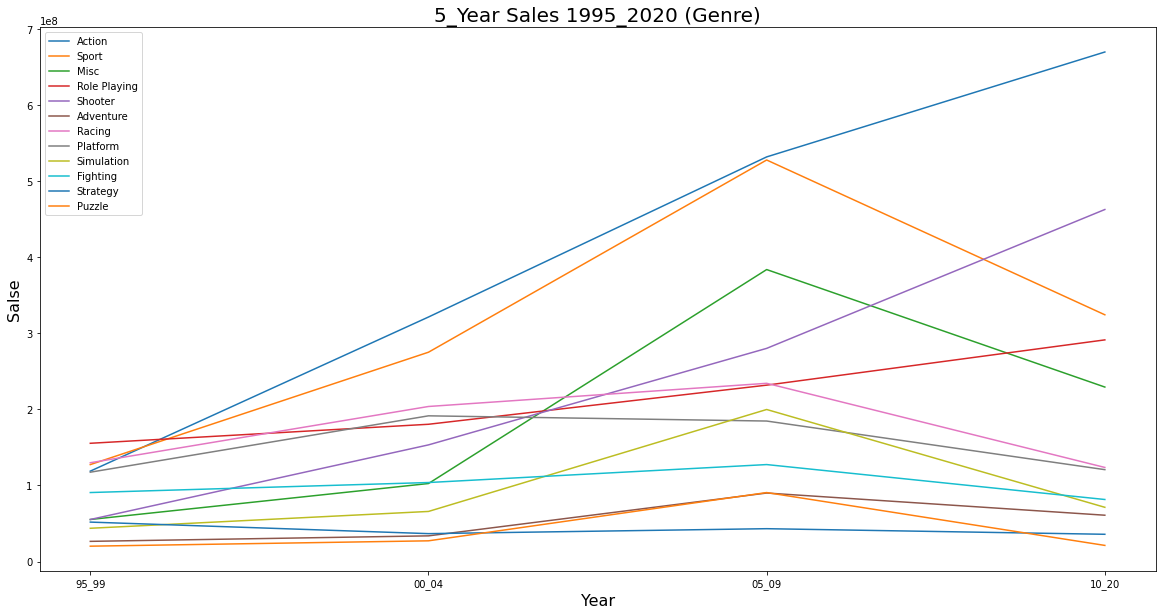

In [301]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('5_Year Sales 1995_2020 (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()

In [302]:
df_platform = df_clean.groupby(['Platform'])['total_sales'].sum().reset_index()
platform = df_platform['Platform'].values

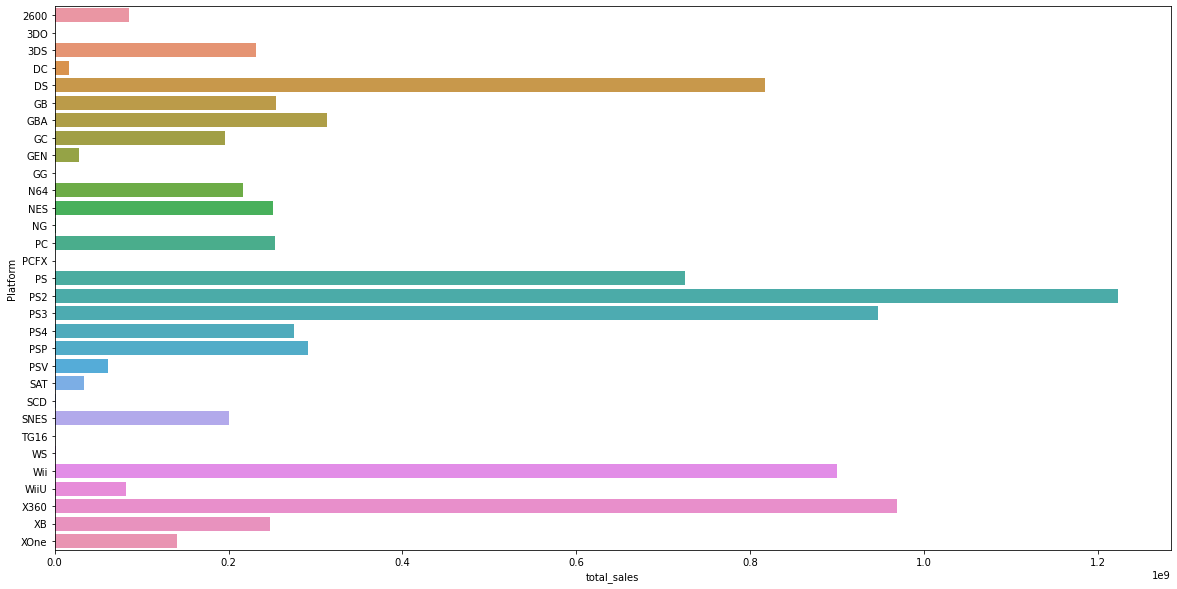

In [303]:
plt.figure(figsize=(20,10))
sns.barplot(x='total_sales', y='Platform', data=df_platform)


plt.show()

In [304]:
df_platform = df_platform.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

In [305]:
df_platform = df_platform.iloc[:15]

In [306]:
df_platform['Platform'].value_counts()

PS2     1
X360    1
PS3     1
Wii     1
DS      1
PS      1
GBA     1
PSP     1
PS4     1
GB      1
PC      1
NES     1
XB      1
3DS     1
N64     1
Name: Platform, dtype: int64

In [307]:
df_platform_year = df_clean.groupby(['Platform', 'Year']).sum().reset_index()
platform_year = df_platform_year['Platform'].values

In [308]:
df_platform

,Platform,total_sales
0,PS2,1222439992
1,X360,968599997
2,PS3,946739996
3,Wii,900149998
4,DS,817239999
5,PS,725159994
6,GBA,312649999
7,PSP,290840000
8,PS4,275779998
9,GB,254429999


In [309]:
df_ps2 = df_clean[df_clean.Platform == 'PS2']
df_ps2_year = df_ps2.groupby('Year')['total_sales'].sum()

df_x360 = df_clean[df_clean.Platform == 'X360']
df_x360_year = df_x360.groupby('Year')['total_sales'].sum()

df_ps3 = df_clean[df_clean.Platform == 'PS3']
df_ps3_year = df_ps3.groupby('Year')['total_sales'].sum()

df_wii = df_clean[df_clean.Platform == 'Wii']
df_wii_year = df_wii.groupby('Year')['total_sales'].sum()

df_ds = df_clean[df_clean.Platform == 'DS']
df_ds_year = df_ds.groupby('Year')['total_sales'].sum()

df_ps = df_clean[df_clean.Platform == 'PS']
df_ps_year = df_ps.groupby('Year')['total_sales'].sum()

df_gba = df_clean[df_clean.Platform == 'GBA']
df_gba_year = df_gba.groupby('Year')['total_sales'].sum()

df_psp = df_clean[df_clean.Platform == 'PSP']
df_psp_year = df_psp.groupby('Year')['total_sales'].sum()

df_ps4 = df_clean[df_clean.Platform == 'PS4']
df_ps4_year = df_ps4.groupby('Year')['total_sales'].sum()

df_gb = df_clean[df_clean.Platform == 'GB']
df_gb_year = df_gb.groupby('Year')['total_sales'].sum()

df_pc = df_clean[df_clean.Platform == 'PC']
df_pc_year = df_pc.groupby('Year')['total_sales'].sum()

df_nes = df_clean[df_clean.Platform == 'NES']
df_nes_year = df_nes.groupby('Year')['total_sales'].sum()

df_xb = df_clean[df_clean.Platform == 'XB']
df_xb_year = df_xb.groupby('Year')['total_sales'].sum()

df_3ds = df_clean[df_clean.Platform == '3DS']
df_3ds_year = df_3ds.groupby('Year')['total_sales'].sum()

df_n64 = df_clean[df_clean.Platform == 'N64']
df_n64_year = df_n64.groupby('Year')['total_sales'].sum()

df_xone = df_clean[df_clean.Platform == 'XOne']
df_xone_year = df_xone.groupby('Year')['total_sales'].sum()

In [310]:
df_n64_year

Year
1996    34100000
1997    39499999
1998    48079999
1999    57870000
2000    33880000
2001     3250000
2002       80000
Name: total_sales, dtype: int64

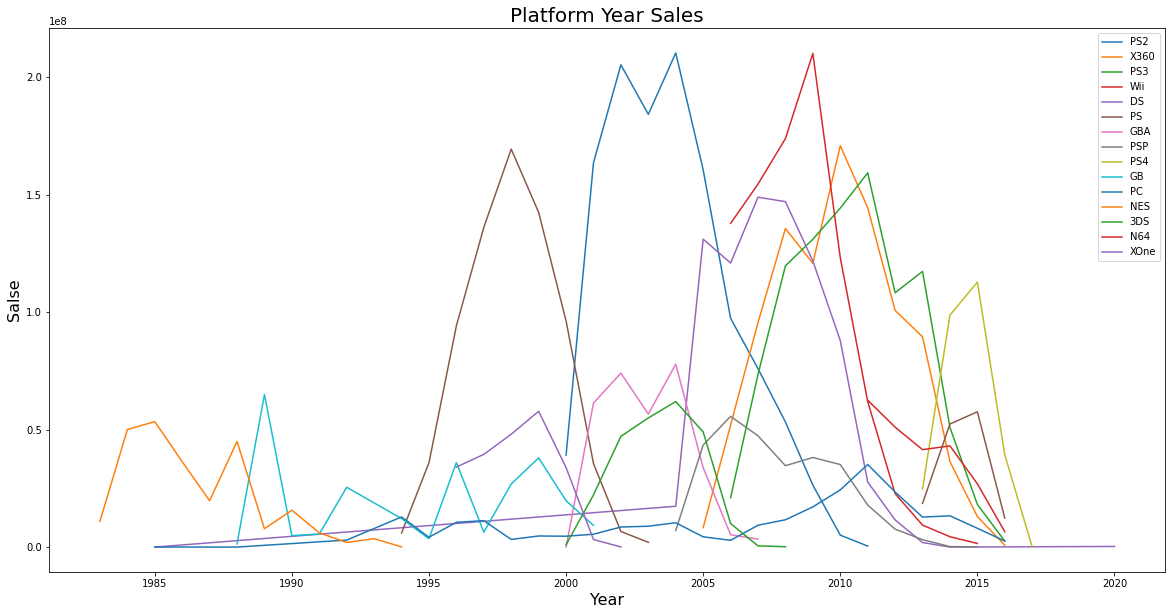

In [311]:
plt.figure(figsize=(20,10))
plt.plot(df_ps2_year.index, df_ps2_year)
plt.plot(df_x360_year.index, df_x360_year)
plt.plot(df_ps3_year.index, df_ps3_year)
plt.plot(df_wii_year.index, df_wii_year)
plt.plot(df_ds_year.index, df_ds_year)
plt.plot(df_ps_year.index, df_ps_year)
plt.plot(df_gba_year.index, df_gba_year)
plt.plot(df_psp_year.index, df_psp_year)
plt.plot(df_ps4_year.index, df_ps4_year)
plt.plot(df_gb_year.index, df_gb_year)
plt.plot(df_pc_year.index, df_pc_year)
plt.plot(df_nes_year.index, df_nes_year)
plt.plot(df_xb_year.index, df_xb_year)
plt.plot(df_3ds_year.index, df_3ds_year)
plt.plot(df_n64_year.index, df_n64_year)
plt.plot(df_xone_year.index, df_xone_year)

plt.title('Platform Year Sales', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'GB', 'PC', 'NES', '3DS', 'N64', 'XOne'])
plt.show()

In [312]:
df_11_16

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
11734,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,Disney Interactive Studios,370000,490000,0,100000,960000
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
11743,LEGO Pirates of the Caribbean: The Video Game,X360,2011,Action,Disney Interactive Studios,540000,420000,0,100000,1060000
4953,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,Idea Factory,0,0,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...
5988,Homefront: The Revolution,XOne,2016,Shooter,Deep Silver,50000,70000,0,10000,130000
14785,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0,0,20000,0,20000
9546,Mirror's Edge Catalyst,PS4,2016,Platform,Electronic Arts,100000,140000,20000,60000,320000
1710,Rose to Tasogare no Kojou,PSV,2016,Action,Nippon Ichi Software,0,0,20000,0,20000


In [313]:
df_2011_upper = df_clean[(df_clean.Year >= 2011) & (df_clean.Year <= 2016)]
df_2011_upper

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
16,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Action,Little Orbit,0,20000,0,0,20000
28,Toaru Kagaku no Chou Denjihou,PSP,2011,Adventure,Kadokawa Shoten,0,0,60000,0,60000
33,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1300000,2069999,180000,650000,4199999
36,NBA 2K15,PS4,2014,Sports,Take-Two Interactive,1460000,540000,10000,370000,2380000
...,...,...,...,...,...,...,...,...,...,...
16260,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0,30000,0,0,30000
16261,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000,120000,0,20000,270000
16267,MindJack,PS3,2011,Shooter,Square Enix,70000,80000,0,30000,180000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000


In [314]:
df_2011_upper.Platform.value_counts()

PS3     703
X360    499
3DS     499
PSV     409
PC      371
PS4     334
PSP     311
XOne    212
Wii     197
DS      187
WiiU    143
PS2       7
Name: Platform, dtype: int64

In [315]:
df_platform_year_2011 = df_2011_upper.groupby(['Platform', 'Year']).sum().reset_index()
platform_year_2011 = df_platform_year_2011['Platform'].values
platform_year_2011

array(['3DS', '3DS', '3DS', '3DS', '3DS', '3DS', 'DS', 'DS', 'DS', 'DS',
       'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PS2', 'PS3', 'PS3', 'PS3',
       'PS3', 'PS3', 'PS3', 'PS4', 'PS4', 'PS4', 'PS4', 'PSP', 'PSP',
       'PSP', 'PSP', 'PSP', 'PSV', 'PSV', 'PSV', 'PSV', 'PSV', 'PSV',
       'Wii', 'Wii', 'Wii', 'Wii', 'Wii', 'WiiU', 'WiiU', 'WiiU', 'WiiU',
       'WiiU', 'X360', 'X360', 'X360', 'X360', 'X360', 'X360', 'XOne',
       'XOne', 'XOne', 'XOne'], dtype=object)

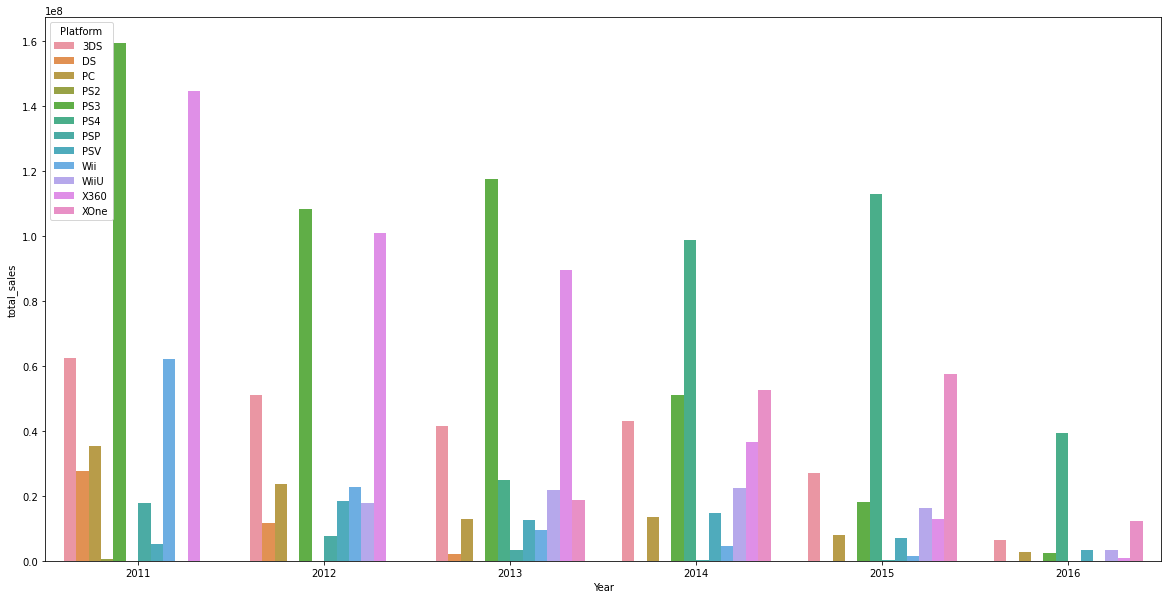

In [316]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='total_sales', data=df_platform_year_2011, hue='Platform')


plt.show()

콘솔 게임 : Wii PS PS2 PS3 PS4 XB X360 XOne GC N64 SNES NES 2600 DC GEN 3D TG16 GG PCFX

In [317]:
df_ps3_2011 = df_2011_upper[df_2011_upper.Platform == 'PS3']
df_ps3_2011_year = df_ps3_2011.groupby('Year')['total_sales'].sum()

df_ps4_2011 = df_2011_upper[df_2011_upper.Platform == 'PS4']
df_ps4_2011_year = df_ps4_2011.groupby('Year')['total_sales'].sum()

df_x360_2011 = df_2011_upper[df_2011_upper.Platform == 'X360']
df_x360_2011_year = df_x360_2011.groupby('Year')['total_sales'].sum()

df_xone_2011 = df_2011_upper[df_2011_upper.Platform == 'XOne']
df_xone_2011_year = df_xone_2011.groupby('Year')['total_sales'].sum()

df_3ds_2011 = df_2011_upper[df_2011_upper.Platform == '3DS']
df_3ds_2011_year = df_3ds_2011.groupby('Year')['total_sales'].sum()

df_pc_2011 = df_2011_upper[df_2011_upper.Platform == 'PC']
df_pc_2011_year = df_2011_upper.groupby('Year')['total_sales'].sum()

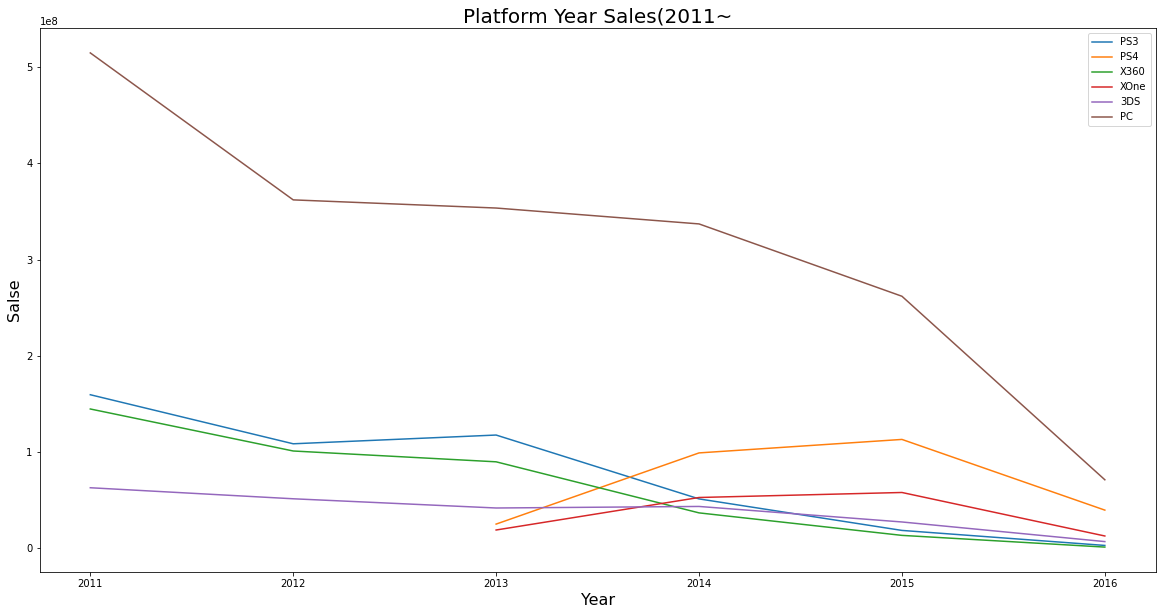

In [318]:
plt.figure(figsize=(20,10))
plt.plot(df_ps3_2011_year.index, df_ps3_2011_year)
plt.plot(df_ps4_2011_year.index, df_ps4_2011_year)
plt.plot(df_x360_2011_year.index, df_x360_2011_year)
plt.plot(df_xone_2011_year.index, df_xone_2011_year)
plt.plot(df_3ds_2011_year.index, df_3ds_2011_year)
plt.plot(df_pc_2011_year.index, df_pc_2011_year)

plt.title('Platform Year Sales(2011~', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['PS3', 'PS4', 'X360', 'XOne', '3DS', 'PC'])
plt.show()

## Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [319]:
df_clean[df_clean['Name'].duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
59,LEGO Star Wars II: The Original Trilogy,GBA,2006,Action,LucasArts,60000,20000,0,0,80000
212,Jikkyou Powerful Pro Baseball 2016,PS4,2016,Sports,Konami Digital Entertainment,0,0,170000,0,170000
226,Call of Duty 4: Modern Warfare,PC,2007,Shooter,Activision,0,1120000,0,30000,1150000
324,IL-2 Sturmovik: Birds of Prey,DS,2009,Simulation,505 Games,60000,0,0,0,60000
344,NASCAR Unleashed,3DS,2011,Racing,Activision,180000,0,0,10000,190000
...,...,...,...,...,...,...,...,...,...,...
16270,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4179999,260000,10000,80000,4529999
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [320]:
duplicated_name = df_clean[df_clean.duplicated(subset=['Name'], keep=False)]

In [321]:
df_clean[df_clean.Name == 'Casper']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
524,Casper,GBA,2002,Adventure,Microids,10000,0,0,0,10000


In [322]:
duplicated_name.sort_values(by='Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15966,007: Quantum of Solace,X360,2008,Action,Activision,820000,520000,10000,140000,1490000
6770,007: Quantum of Solace,PS3,2008,Action,Activision,430000,520000,20000,200000,1170000
2697,007: Quantum of Solace,PS2,2008,Action,Activision,170000,0,0,260000,430000
9338,007: Quantum of Solace,DS,2008,Action,Activision,110000,10000,0,10000,130000
5466,007: Quantum of Solace,Wii,2008,Action,Activision,300000,290000,10000,70000,670000
...,...,...,...,...,...,...,...,...,...,...
13510,pro evolution soccer 2011,Wii,2010,Sports,Konami Digital Entertainment,80000,100000,30000,20000,230000
5752,pro evolution soccer 2011,PS3,2010,Sports,Konami Digital Entertainment,290000,1180000,540000,410000,2420000
15939,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,40000,210000,50000,110000,410000
14746,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,80000,90000,0,20000,190000


In [323]:
duplicated_name['Name'].value_counts()

Need for Speed: Most Wanted             12
LEGO Marvel Super Heroes                 9
Ratatouille                              9
FIFA 14                                  9
FIFA 15                                  8
                                        ..
Rat Attack!                              2
Strike Witches: Shirogane no Tsubasa     2
Vietcong: Purple Haze                    2
SimAnimals Africa                        2
Pump It Up: Exceed                       2
Name: Name, Length: 2712, dtype: int64

In [324]:
Need_for_Speed_Most_Wanted = duplicated_name[duplicated_name.Name == 'Need for Speed: Most Wanted']

In [325]:
Need_for_Speed_Most_Wanted.total_sales.sum()

14079999

In [326]:
df_name_total_sales = df_clean.groupby('Name',as_index=False)['total_sales'].sum()

In [327]:
df_name_total_sales = pd.DataFrame(df_name_total_sales)

In [328]:
df_name_total_sales = df_name_total_sales.sort_values(by='total_sales', ascending=False)

In [329]:
df_total_sales_rank_10 = df_name_total_sales.iloc[:10]
df_total_sales_rank_10 = df_total_sales_rank_10.reset_index()
df_total_sales_rank_10 = df_total_sales_rank_10.iloc[:, 1:3]
df_total_sales_rank_10

,Name,total_sales
0,Wii Sports,82740000
1,Grand Theft Auto V,55919998
2,Super Mario Bros.,45310000
3,Tetris,35840000
4,Mario Kart Wii,35830000
5,Wii Sports Resort,33000000
6,Pokemon Red/Pokemon Blue,31380000
7,Call of Duty: Modern Warfare 3,30840000
8,New Super Mario Bros.,30010000
9,Call of Duty: Black Ops II,29730000


In [330]:
abc = np.array(df_total_sales_rank_10.Name)

In [331]:
df_total_sales_rank_10_list = []

for i in range(len(df_total_sales_rank_10)):
  ratio_sample = df_total_sales_rank_10.total_sales.iloc[i] / df_total_sales_rank_10.total_sales.sum()
  df_total_sales_rank_10_list.append(round(ratio_sample, 3))  

df_total_sales_rank_10_list

[0.202, 0.136, 0.11, 0.087, 0.087, 0.08, 0.076, 0.075, 0.073, 0.072]

In [332]:
df_total_sales_rank_10_list = np.array(df_total_sales_rank_10_list)

In [333]:
df_total_sales_rank_10_list = df_total_sales_rank_10_list * 100

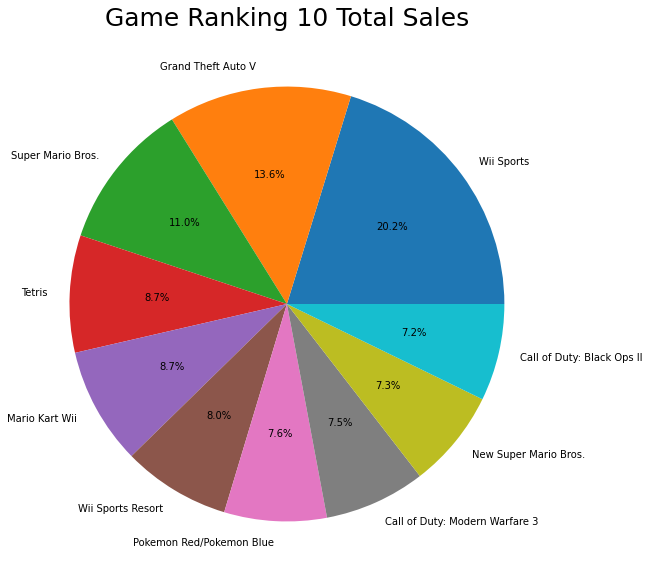

In [334]:
ratio = df_total_sales_rank_10_list
labels = abc

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 Total Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [335]:
continent = df_clean.groupby('Name', as_index=False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [336]:
continent_na = continent.sort_values(by='NA_Sales', ascending=False)

In [337]:
continent_na = continent_na.iloc[:10]

In [338]:
continent_na = continent_na.loc[:,['Name','NA_Sales']]

In [339]:
continent_na = continent_na.reset_index(drop=True)

In [340]:
continent_na

,Name,NA_Sales
0,Wii Sports,41490000
1,Super Mario Bros.,32480000
2,Duck Hunt,26930000
3,Tetris,26170000
4,Grand Theft Auto V,23460000
5,Call of Duty: Black Ops,17010000
6,Super Mario World,15990000
7,Mario Kart Wii,15850000
8,Wii Sports Resort,15750000
9,Call of Duty: Modern Warfare 3,15580000


In [341]:
bcd = np.array(continent_na.Name)

In [342]:
continent_na_list = []

for i in range(len(continent_na)):
  ratio_sample = continent_na.NA_Sales.iloc[i] / continent_na.NA_Sales.sum()
  continent_na_list.append(round(ratio_sample, 3))  

continent_na_list

[0.18, 0.141, 0.117, 0.113, 0.102, 0.074, 0.069, 0.069, 0.068, 0.068]

In [343]:
continent_na_list = np.array(continent_na_list)

In [344]:
continent_na_list = continent_na_list * 100

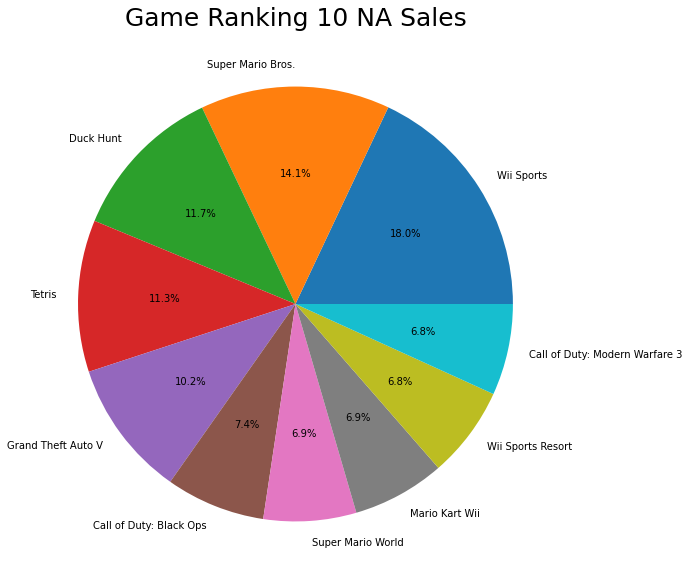

In [345]:
ratio = continent_na_list
labels = bcd

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 NA Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [346]:
df.head(1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01


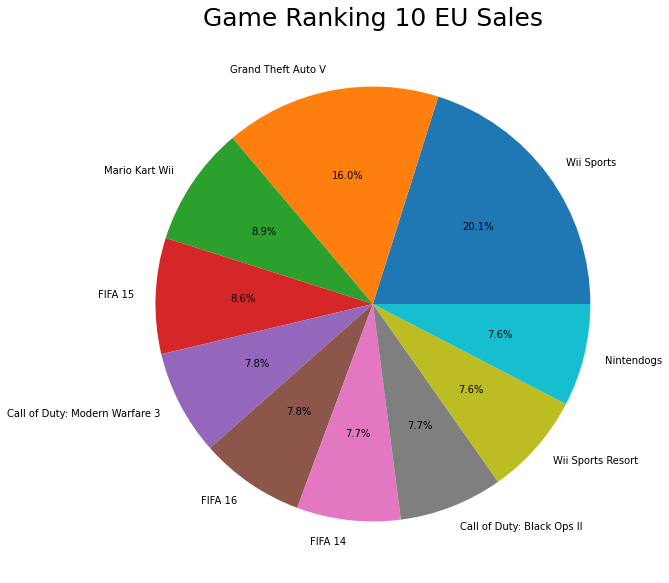

In [347]:
continent_eu = continent.sort_values(by='EU_Sales', ascending=False)
continent_eu = continent_eu.iloc[:10]
continent_eu = continent_eu.loc[:,['Name','EU_Sales']]
continent_eu = continent_eu.reset_index(drop=True)
cde = np.array(continent_eu.Name)

continent_eu_list = []

for i in range(len(continent_eu)):
  ratio_sample = continent_eu.EU_Sales.iloc[i] / continent_eu.EU_Sales.sum()
  continent_eu_list.append(round(ratio_sample, 3))  

continent_eu_list = np.array(continent_eu_list)

continent_eu_list = continent_eu_list * 100

ratio = continent_eu_list
labels = cde

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 EU Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [348]:
continent_eu

,Name,EU_Sales
0,Wii Sports,29020000
1,Grand Theft Auto V,23039999
2,Mario Kart Wii,12880000
3,FIFA 15,12400000
4,Call of Duty: Modern Warfare 3,11290000
5,FIFA 16,11290000
6,FIFA 14,11140000
7,Call of Duty: Black Ops II,11050000
8,Wii Sports Resort,11010000
9,Nintendogs,11000000


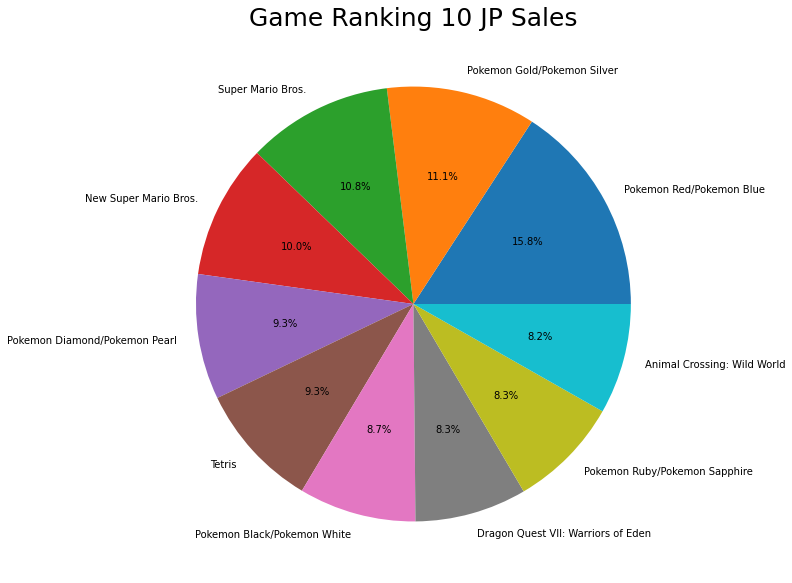

In [349]:
continent_jp = continent.sort_values(by='JP_Sales', ascending=False)
continent_jp = continent_jp.iloc[:10]
continent_jp = continent_jp.loc[:,['Name','JP_Sales']]
continent_jp = continent_jp.reset_index(drop=True)
efg = np.array(continent_jp.Name)

continent_jp_list = []

for i in range(len(continent_jp)):
  ratio_sample = continent_jp.JP_Sales.iloc[i] / continent_jp.JP_Sales.sum()
  continent_jp_list.append(round(ratio_sample, 3))  

continent_jp_list = np.array(continent_jp_list)
continent_jp_list = continent_jp_list * 100

ratio = continent_jp_list
labels = efg

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 JP Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [350]:
continent_jp

,Name,JP_Sales
0,Pokemon Red/Pokemon Blue,10220000
1,Pokemon Gold/Pokemon Silver,7200000
2,Super Mario Bros.,6960000
3,New Super Mario Bros.,6500000
4,Pokemon Diamond/Pokemon Pearl,6040000
5,Tetris,6030000
6,Pokemon Black/Pokemon White,5650000
7,Dragon Quest VII: Warriors of Eden,5399999
8,Pokemon Ruby/Pokemon Sapphire,5380000
9,Animal Crossing: Wild World,5330000


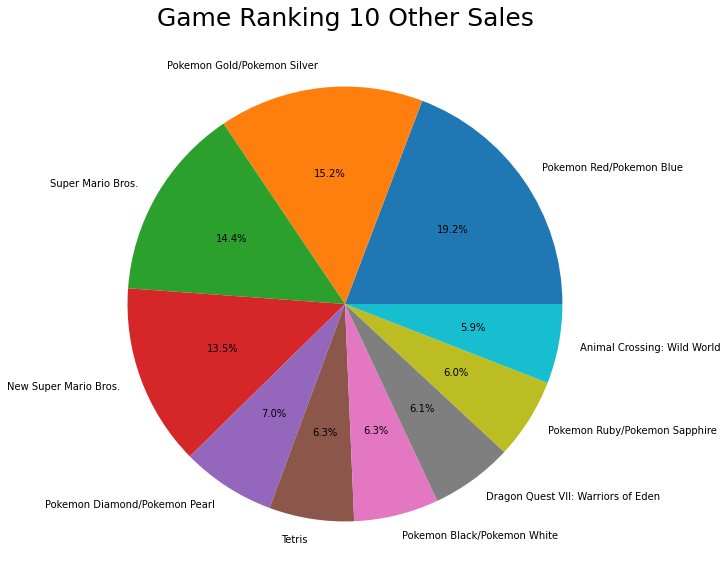

In [351]:
continent_other = continent.sort_values(by='Other_Sales', ascending=False)
continent_other = continent_other.iloc[:10]
continent_other = continent_other.loc[:,['Name','Other_Sales']]
continent_other = continent_other.reset_index(drop=True)
fgh = np.array(continent_other.Name)

continent_other_list = []

for i in range(len(continent_other)):
  ratio_sample = continent_other.Other_Sales.iloc[i] / continent_other.Other_Sales.sum()
  continent_other_list.append(round(ratio_sample, 3))  

continent_other_list = np.array(continent_other_list)
continent_other_list = continent_other_list * 100

ratio = continent_other_list
labels = efg

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 Other Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [352]:
continent_other

,Name,Other_Sales
0,Grand Theft Auto: San Andreas,10720000
1,Wii Sports,8460000
2,Grand Theft Auto V,8029999
3,Gran Turismo 4,7530000
4,Call of Duty: Black Ops II,3880000
5,FIFA Soccer 08,3530000
6,Pro Evolution Soccer 2008,3510000
7,Call of Duty: Black Ops 3,3420000
8,Call of Duty: Modern Warfare 3,3350000
9,Mario Kart Wii,3310000


In [353]:
df_name_total_sales

,Name,total_sales
10854,Wii Sports,82740000
3655,Grand Theft Auto V,55919998
9208,Super Mario Bros.,45310000
9590,Tetris,35840000
5497,Mario Kart Wii,35830000
...,...,...
4305,Instant Brain,10000
1720,Curse of the Amsterdam Diamond,10000
9007,Starry ? Sky: After Autumn,10000
7189,Planet Monsters,10000


In [354]:
df_name_sales = df_clean.groupby('Name', as_index=False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [355]:
df_name_sales

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,150000,100000,120000,30000
1,.hack//G.U. Vol.1//Rebirth,0,0,170000,0
2,.hack//G.U. Vol.2//Reminisce,110000,90000,0,30000
3,.hack//G.U. Vol.2//Reminisce (jp sales),0,0,160000,0
4,.hack//G.U. Vol.3//Redemption,0,0,170000,0
...,...,...,...,...,...
11325,thinkSMART FAMILY!,30000,0,0,0
11326,thinkSMART: Chess for Kids,10000,0,0,0
11327,uDraw Studio,1670000,580000,0,200000
11328,uDraw Studio: Instant Artist,90000,100000,0,20000


In [356]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [357]:
df_total_sales = df_clean.sort_values(by='total_sales', ascending=False)

In [358]:
df_total_sales = df_total_sales.iloc[:10]
df_total_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2943,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
4195,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
12362,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3373,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
7738,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
1281,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000
6867,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
3047,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
16212,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
10332,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000


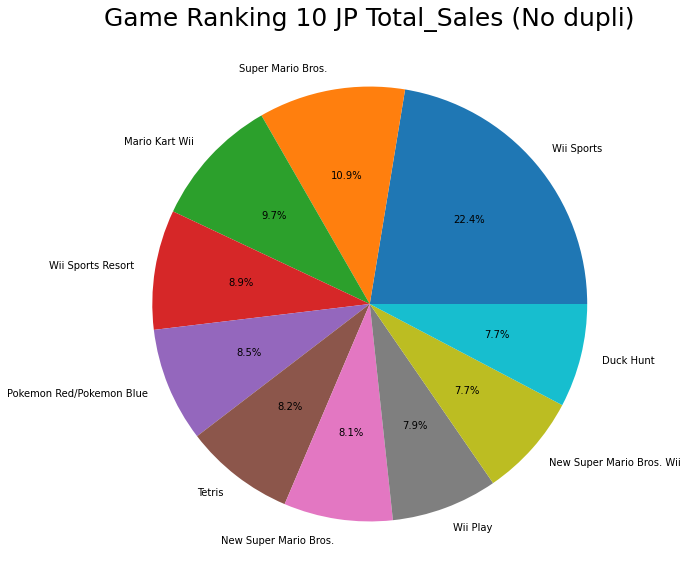

In [359]:
df_total_sales = df_total_sales.reset_index(drop=True)
fgh = np.array(df_total_sales.Name)
df_total_sales_list = []

for i in range(len(df_total_sales)):
  ratio_sample = df_total_sales.total_sales.iloc[i] / df_total_sales.total_sales.sum()
  df_total_sales_list.append(round(ratio_sample, 3))  

df_total_sales_list = np.array(df_total_sales_list)
df_total_sales_list = df_total_sales_list * 100

ratio = df_total_sales_list
labels = fgh

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 JP Total_Sales (No dupli)', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [360]:
df_year_genre = df_clean.groupby(['Year', 'Genre']).size().reset_index(name='Count')
year_genre_bool = df_year_genre.groupby(['Year'])['Count'].transform(max) == df_year_genre['Count']
year_max_genre = df_year_genre[year_genre_bool].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','Count']).reset_index(drop=True)
year_max_genre.rename(index = {'Count': 'Sales'}, inplace = True)
year_max_genre

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1985,Platform,4
6,1986,Action,6
7,1987,Sports,4
8,1988,Platform,4
9,1989,Puzzle,5


In [361]:
df_year_genre

,Year,Genre,Count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


In [362]:
duplicated_name

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
6,Mobile Suit Gundam,PS,1995,Action,Namco Bandai Games,0,0,420000,30000,450000
10,S.C.A.R.S,PS,1998,Racing,Ubisoft,50000,30000,0,10000,90000
13,Super Robot Taisen F Kanketsuhen,SAT,1998,Strategy,Banpresto,0,0,550000,0,550000
...,...,...,...,...,...,...,...,...,...,...
16270,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4179999,260000,10000,80000,4529999
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [363]:
duplicated_name[duplicated_name.Name == 'Call of Duty: Modern Warfare 3']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2846,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
11003,Call of Duty: Modern Warfare 3,PC,2011,Shooter,Activision,410000,980000,0,330000,1720000
13862,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000,5820000,490000,1620000,13470000


In [364]:
duple_name_year = duplicated_name[(duplicated_name.Year >= 2011) & (duplicated_name.Year <=2020)]

In [365]:
df_duple_name_year_total_sales = duple_name_year.groupby('Name',as_index=False)['total_sales'].sum()
df_duple_name_year_total_sales = pd.DataFrame(df_duple_name_year_total_sales)
df_duple_name_year_total_sales = df_duple_name_year_total_sales.sort_values(by='total_sales', ascending=False)

In [366]:
df_duple_name_year_total_sales

,Name,total_sales
287,Grand Theft Auto V,55919998
102,Call of Duty: Modern Warfare 3,30840000
100,Call of Duty: Black Ops II,29730000
101,Call of Duty: Ghosts,27370000
99,Call of Duty: Black Ops 3,25299999
...,...,...
356,Kiniro no Corda 3,10000
116,Chaos;Head Noah,10000
139,Dead Rising,10000
502,Ninja Gaiden Sigma 2,10000


In [367]:
df_duple_name_year_total_sales_rank_10 = df_duple_name_year_total_sales.iloc[:10]
df_duple_name_year_total_sales_rank_10 = df_duple_name_year_total_sales_rank_10.reset_index()
df_duple_name_year_total_sales_rank_10 = df_duple_name_year_total_sales_rank_10.iloc[:, 1:3]
df_duple_name_year_total_sales_rank_10

,Name,total_sales
0,Grand Theft Auto V,55919998
1,Call of Duty: Modern Warfare 3,30840000
2,Call of Duty: Black Ops II,29730000
3,Call of Duty: Ghosts,27370000
4,Call of Duty: Black Ops 3,25299999
5,Minecraft,23750000
6,Call of Duty: Advanced Warfare,21890000
7,The Elder Scrolls V: Skyrim,19279999
8,FIFA 15,19020000
9,Battlefield 3,17370000


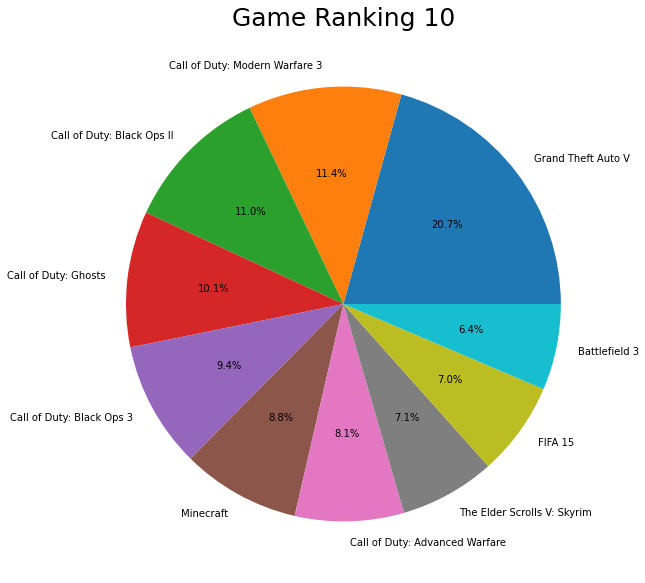

In [368]:
zxc = np.array(df_duple_name_year_total_sales_rank_10.Name)

df_duple_name_year_total_sales_rank_10_list = []

for i in range(len(df_duple_name_year_total_sales_rank_10)):
  ratio_sample = df_duple_name_year_total_sales_rank_10.total_sales.iloc[i] / df_duple_name_year_total_sales_rank_10.total_sales.sum()
  df_duple_name_year_total_sales_rank_10_list.append(round(ratio_sample, 3))  

df_duple_name_year_total_sales_rank_10_list = np.array(df_duple_name_year_total_sales_rank_10_list)

df_duple_name_year_total_sales_rank_10_list = df_duple_name_year_total_sales_rank_10_list * 100

ratio = df_duple_name_year_total_sales_rank_10_list
labels = zxc

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [369]:
gta5 = duple_name_year[duple_name_year.Name == 'Grand Theft Auto V']
gta5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2067,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000,11990000
3500,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
10668,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2660000,2009999,0,410000,5079999
10744,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
16255,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360000,640000,0,80000,1080000


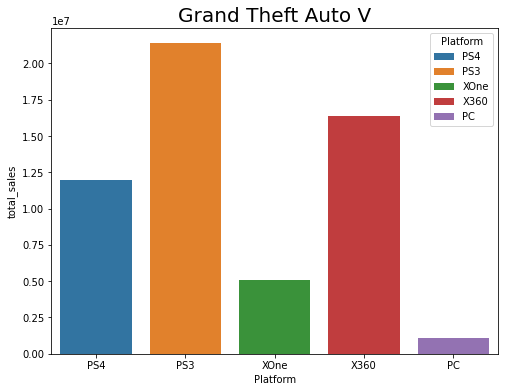

In [370]:
plt.figure(figsize=(8,6))
sns.barplot(x='Platform', y='total_sales', data=gta5, hue='Platform', dodge=False)

plt.title('Grand Theft Auto V', fontsize=20,)
plt.show()

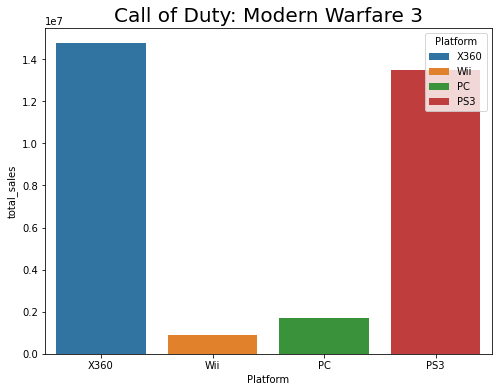

In [371]:
cod = duple_name_year[duple_name_year.Name == 'Call of Duty: Modern Warfare 3']

plt.figure(figsize=(8,6))
sns.barplot(x='Platform', y='total_sales', data=cod, hue='Platform', dodge=False)

plt.title('Call of Duty: Modern Warfare 3', fontsize=20)
plt.show()

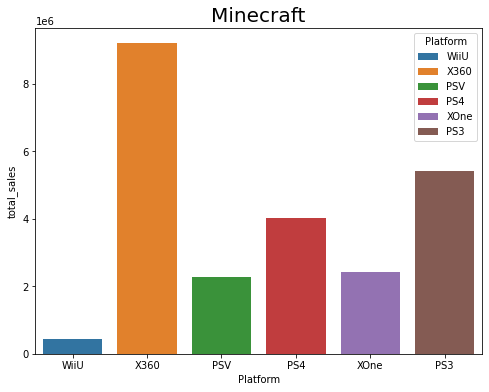

In [372]:
mine = duple_name_year[duple_name_year.Name == 'Minecraft']

plt.figure(figsize=(8,6))
sns.barplot(x='Platform', y='total_sales', data=mine, hue='Platform', dodge=False)

plt.title('Minecraft', fontsize=20)
plt.show()